In [1]:
import os
import anndata as ad
import umap
import scipy as sip
from scipy import sparse
from sklearn import preprocessing
import scanpy as scp
import pickle
import pandas as pd
import numpy as np
import igraph as ig
import seaborn as sb
import snf
import sklearn as skl
from sklearn import cluster
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import v_measure_score
from snf import compute, metrics
import matplotlib.pyplot as plt
from PyComplexHeatmap import *
from collections import Counter
import math

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-usin

In [2]:
min_max_scalar = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

In [3]:
data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

original = os.path.join(input, "original")
complementary = os.path.join(input, "complementary")

pb = os.path.join(output, "pb")
shared = os.path.join(output, "shared")


level1 = os.path.join(output, "level1")
level2 = os.path.join(output, "level2")
level3 = os.path.join(output, "level3_snf")
level4 = os.path.join(output, "level4")

In [4]:
with open(os.path.join(level1, "module_data.pickle"), "rb") as f:
    module_data = pickle.load(f) 
with open(os.path.join(level1, "noise_graphs_with_74_nodes.pickle"), "rb") as f:
    noise_74 = pickle.load(f) 


with open(os.path.join(complementary, "shared_patients_across_level1_networks_74.pickle"), "rb") as f:
    patients_74 = pickle.load(f) 
with open(os.path.join(complementary, "noise_name_to_id.pickle"), "rb") as f:
    noise_name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "noise_id_to_name.pickle"), "rb") as f:
    noise_id_to_name = pickle.load(f) 
with open(os.path.join(complementary, "id_to_name.pickle"), "rb") as f:
    id_to_name = pickle.load(f) 
with open(os.path.join(complementary, "name_to_id.pickle"), "rb") as f:
    name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "module_name_to_id.pickle"), "rb") as f:
    module_name_to_id = pickle.load(f) 
with open(os.path.join(complementary, "id_to_module_name.pickle"), "rb") as f:
    id_to_module_name = pickle.load(f) 
    


with open(os.path.join(complementary, "ground_truth_dg.pickle"), "rb") as f:
    ground_truth_dg = pickle.load(f) 
with open(os.path.join(complementary, "ground_truth_d.pickle"), "rb") as f:
    ground_truth_d = pickle.load(f) 
with open(os.path.join(complementary, "disease_groups.pickle"), "rb") as f:
    disease_groups = pickle.load(f) 
with open(os.path.join(complementary, "diseases.pickle"), "rb") as f:
    diseases = pickle.load(f) 



with open(os.path.join(shared, 'shared_patient_75_to_all_diseases.pickle'), 'rb') as f:
    patient_to_disease_evolution = pickle.load(f)
with open(os.path.join(shared, 'patient_to_assigned_disease.pickle'), 'rb') as f:
    patient_to_disease = pickle.load(f)
with open(os.path.join(shared, 'patient_to_disease_group.pickle'), 'rb') as f:
    patient_to_disease_group = pickle.load(f)
with open(os.path.join(shared, 'disease_group_to_patient.pickle'), 'rb') as f:
    disease_group_to_patient = pickle.load(f)
with open(os.path.join(shared, 'assigned_disease_to_patient.pickle'), 'rb') as f:
    patient_to_disease = pickle.load(f)



with open(os.path.join(level1, 'noise_correlations.pickle'), 'rb') as f:
    noise_correlations = pickle.load(f)
with open(os.path.join(level1, 'noise_knn_PSNs.pickle'), 'rb') as f:
    noise_knn_PSNs = pickle.load(f)
with open(os.path.join(level1, 'noise_kernel_PSNs.pickle'), 'rb') as f:
    noise_kernel_PSNs = pickle.load(f)

with open(os.path.join(level1, "id_to_feature_matrices.pickle"), "rb") as f:
    id_to_feature_matrices = pickle.load(f) 
with open(os.path.join(level1, 'weights_optimized.pickle'), 'rb') as f:
    weights = pickle.load(f)
with open(os.path.join(level1, 'all_dict.pickle'), 'rb') as f: # none noise + noise PSN, AFF, Corr together
    all_dict = pickle.load(f)


In [5]:
with open(os.path.join(level1, 'labels_kernel_snf_sc.pickle'), 'rb') as f: # labels of individual psns 
    labels_kernel_sc = pickle.load(f)
with open(os.path.join(level1, 'labels_knn_wa_leiden.pickle'), 'rb') as f:
    labels_knn_leiden = pickle.load(f)

In [6]:
with open(os.path.join(level1, "ad_graphs.pickle"), "rb") as f:
    level1_graphs = pickle.load(f) 
with open(os.path.join(level2, "ad_graphs.pickle"), "rb") as f:
    level2_graphs = pickle.load(f) 
with open(os.path.join(level4, "ad_graphs.pickle"), "rb") as f:
    level4_graphs = pickle.load(f) 
    

with open(os.path.join(level1, 'correlations.pickle'), 'rb') as f:
    correlations_level1 = pickle.load(f)
with open(os.path.join(level1, 'knn_PSNs.pickle'), 'rb') as f:
    knn_PSNs_level1 = pickle.load(f)
with open(os.path.join(level1, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level1 = pickle.load(f)
with open(os.path.join(level1, 'labels.pickle'), 'rb') as f: 
    labels_level1 = pickle.load(f)


with open(os.path.join(level1, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level1 = pickle.load(f)
with open(os.path.join(level1, 'fused_knn.pickle'), 'rb') as f:
    fused_knn_level1 = pickle.load(f)
with open(os.path.join(level1, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level1 = pickle.load(f)

In [7]:
with open(os.path.join(level2, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level2 = pickle.load(f)
with open(os.path.join(level2, 'labels.pickle'), 'rb') as f: 
    labels_level2 = pickle.load(f)
with open(os.path.join(level2, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level2 = pickle.load(f)
with open(os.path.join(level2, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level2 = pickle.load(f)

with open(os.path.join(level3, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level3 = pickle.load(f)
with open(os.path.join(level3, 'labels.pickle'), 'rb') as f: 
    labels_level3 = pickle.load(f)
with open(os.path.join(level3, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level3 = pickle.load(f)
with open(os.path.join(level3, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level3 = pickle.load(f)

with open(os.path.join(level4, 'kernel_PSNs.pickle'), 'rb') as f:
    kernel_PSNs_level4 = pickle.load(f)
with open(os.path.join(level4, 'labels.pickle'), 'rb') as f: 
    labels_level4 = pickle.load(f)
with open(os.path.join(level4, 'fused_corrs.pickle'), 'rb') as f:
    fused_corrs_level4 = pickle.load(f)
with open(os.path.join(level4, 'fused_kernel.pickle'), 'rb') as f:
    fused_kernel_level4 = pickle.load(f)

In [10]:
optimal_graph = []
for i, dg1 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
    neighbors_of_i = []
    for j, dg2 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
        if i == j or dg1 != dg2:
            neighbors_of_i.append(0)
        else:
            neighbors_of_i.append(1)
    optimal_graph.append(neighbors_of_i)
    
optimal_graph = np.array(optimal_graph, dtype = "float64")
print(optimal_graph)

optimal_rw_score = 74

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [12]:
panelize_reward_d = []
panelize_reward_dg = []

for i in patients_74:
    panelize_reward_d_ij = []
    panelize_reward_dg_ij = []

    d1 = level1_graphs["G0"][i].obs.Disease[0]
    dg1 = level1_graphs["G0"][i].obs.DiseaseGroup[0]

    for j in patients_74:
        d2 = level1_graphs["G0"][j].obs.Disease[0]
        dg2 = level1_graphs["G0"][j].obs.DiseaseGroup[0]

        if d1 == d2:
            panelize_reward_d_ij.append(1)
        else:
            panelize_reward_d_ij.append(-1)
        """elif dg1 == dg2:
            p_d_ij.append(0.5)
        elif d1 == "HV" or d2 == "HV":
            p_d_ij.append(-1)
        else:
            p_d_ij.append(-0.5)"""

        if dg1 == dg2:
            panelize_reward_dg_ij.append(1)
        elif dg1 == "Healthy" or dg2 == "Healthy":
            panelize_reward_dg_ij.append(-2)
        else:
            panelize_reward_dg_ij.append(-1)

    panelize_reward_d.append(panelize_reward_d_ij)
    panelize_reward_dg.append(panelize_reward_dg_ij)


for i in range(len(panelize_reward_dg)):
    panelize_reward_d[i][i] = 0
    panelize_reward_dg[i][i] = 0

panelize_reward_d = np.array(panelize_reward_d, dtype="float64")
panelize_reward_dg = np.array(panelize_reward_dg, dtype="float64")

def make_transition_matrix(fused_network):
    tm = []
    for i in range(len(fused_network)):
        tm.append( fused_network[i] / fused_network[i].sum())
    return tm

def random_walker_objective(transition_matrix):
    d_score = (transition_matrix * panelize_reward_d).sum()
    dg_score = (transition_matrix * panelize_reward_dg).sum()
    #score = 0.5 * d_score + 0.5 * dg_score
    score =  dg_score
    return d_score, dg_score, score

In [14]:
# For every modality, extract the set of graphs belonging to it
citeRNA_knn_74 = {}
bulkRNA_knn_74 = {}
luminex_knn_74 = {}
cytof_knn_74 = {}
adt_knn_74 = {}
facs_knn_74 = {}

citeRNA_kernel_74 = {}
bulkRNA_kernel_74 = {}
luminex_kernel_74 = {}
cytof_kernel_74 = {}
adt_kernel_74 = {}
facs_kernel_74 = {}


for id, g in level1_graphs.items():
    modality = g.uns["modality"]
    if modality == "citeRNA":
        citeRNA_knn_74[id] = knn_PSNs_level1[id]
        citeRNA_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "bulkRNA":
        bulkRNA_knn_74[id] = knn_PSNs_level1[id]
        bulkRNA_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "cytof":
        cytof_knn_74[id] = knn_PSNs_level1[id]
        cytof_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "luminex":
        luminex_knn_74[id] = knn_PSNs_level1[id]
        luminex_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "facs":
        facs_knn_74[id] = knn_PSNs_level1[id]
        facs_kernel_74[id] = kernel_PSNs_level1[id]
    elif modality == "adt":
        adt_knn_74[id] = knn_PSNs_level1[id]
        adt_kernel_74[id] = kernel_PSNs_level1[id]

# Level1 Contributions

### SNF - Kernel - SC

In [21]:
tm = make_transition_matrix(fused_kernel_level1)
fused_rw_score = random_walker_objective(tm)[2]

fused_silhouette_score = skl.metrics.silhouette_score(fused_kernel_level1, labels_level1["labels_fused_kernel"])
fused_davies_bouldin_score = skl.metrics.davies_bouldin_score(fused_kernel_level1, labels_level1["labels_fused_kernel"])


silhouette_dict_kernel  = {}
davies_bouldin_kernel = {}
score_kernel = {}

for i, k in enumerate(level1_graphs.keys()):
    print(i,"/",len(level1_graphs))
    loo = kernel_PSNs_level1.copy()
    loo.pop(k)

    loo_fused = compute.snf(list(loo.values()), K=8, t = 40)

    tm = make_transition_matrix(loo_fused)
    loo_rw_score = random_walker_objective(tm)[2]

    first, second = compute.get_n_clusters(loo_fused)
    loo_labels = cluster.spectral_clustering(loo_fused, n_clusters=first, n_init = 40)

    loo_silhouette_score = skl.metrics.silhouette_score(loo_fused, loo_labels)
    loo_davies_bouldin_score = skl.metrics.davies_bouldin_score(loo_fused, loo_labels)

    if loo_silhouette_score > fused_silhouette_score:
        silhouette_dict_kernel[k] = -abs(fused_silhouette_score - loo_silhouette_score )
    else:
        silhouette_dict_kernel[k] =  abs(fused_silhouette_score - loo_silhouette_score )


    if loo_davies_bouldin_score < fused_davies_bouldin_score:
        davies_bouldin_kernel[k] = -abs(fused_davies_bouldin_score - loo_davies_bouldin_score )
    else:
        davies_bouldin_kernel[k] =  abs(fused_davies_bouldin_score - loo_davies_bouldin_score )

    
    if loo_rw_score > fused_rw_score:
       score_kernel[k] = -abs(loo_rw_score - fused_rw_score )
    else:
        score_kernel[k] =  abs(loo_rw_score - fused_rw_score )

0 / 246
1 / 246
2 / 246
3 / 246
4 / 246


KeyboardInterrupt: 

<Axes: >

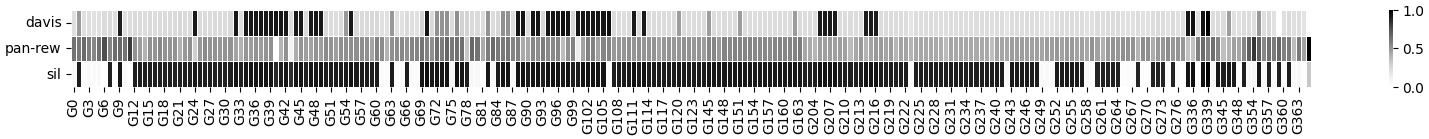

In [42]:
df_score = pd.DataFrame.from_dict(score_kernel, orient="index")
df_davis = pd.DataFrame.from_dict(davies_bouldin_kernel, orient="index")
df_sil = pd.DataFrame.from_dict(silhouette_dict_kernel, orient="index")
df_kernel = df_davis.join(df_score, lsuffix="davis", rsuffix="pan-rew").join(df_sil, rsuffix="sil")

df_kernel.rename(columns={"0pan-rew":"pan-rew", "0davis":"davis", 0: "sil"}, inplace=True)
df_kernel = pd.DataFrame(min_max_scalar.fit_transform(df_kernel), index = df_kernel.index, columns = df_kernel.columns) # Data Frame containing normalized data for each score

fig, ax = plt.subplots(figsize=(20,1))
sb.heatmap(df_kernel.transpose(), linewidth=.5, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})


<Axes: >

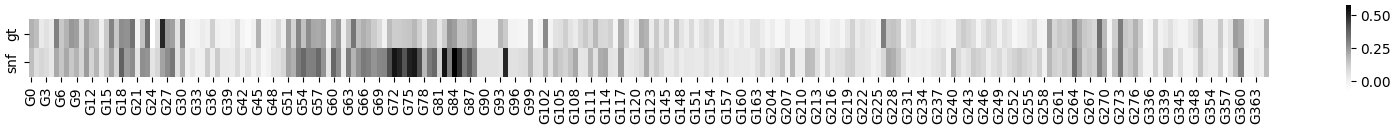

In [23]:
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level1["labels_fused_kernel"]} 
for name in list(level1_graphs.keys()):
    kernel_labels[name] = labels_level1["unimodal_kernel_labels"][name]


ami_kernel = []
for k1 in list(kernel_labels.keys())[:2]:
    g1 = kernel_labels[k1]
    ami_with_g1 = []
    for k2 in list(kernel_labels.keys())[2:]:
        g2 = kernel_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_kernel.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(level1_graphs.keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

In [25]:
contribution_differences = []
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(level1_graphs.keys()))

for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    contribution_differences.append(abs(gt_cont - snf_cont))

tolerance = np.percentile(contribution_differences, 35)
contribution = []


for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    if abs(gt_cont - snf_cont) <= tolerance:
        contribution.append("equal")
    elif gt_cont > snf_cont:
        contribution.append("low")
    elif gt_cont < snf_cont:
        contribution.append("high")

In [26]:
cell_types = []
modules = []

for id, g in level1_graphs.items():
    process = g.uns["module"]
    modality = g.uns["modality"]
    name = g.uns["name"]
    g.uns["process"] = process
    if modality == "citeRNA":
        ct = name.split("_")[1].split("-")[0]
        module = name.split("_")[1].split("-")[1]
        g.uns["module"] = module
        g.uns["cell-type"] = ct
        cell_types.append(ct)
        modules.append(module)
    elif modality == "adt" or modality == "cytof":
        ct = name.split("_")[1]
        g.uns["module"] = "None"
        g.uns["cell-type"] = ct
        modules.append("None")
        cell_types.append(ct)
    elif modality == "bulkRNA": 
        module = name.split("_")[1]
        g.uns["module"] = module
        g.uns["cell-type"] = "bulk"
        modules.append(module)
        cell_types.append("bulk")
    elif modality == "luminex": 
        g.uns["module"] = "None"
        g.uns["cell-type"] = "bulk"
        cell_types.append("bulk")
        modules.append("None")
    else: 
        g.uns["module"] = "None"
        g.uns["cell-type"] = "CD4"
        cell_types.append("CD4")
        modules.append("None")

/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_37545/2136914989.py:8: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  g.uns["process"] = process
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_37545/2136914989.py:8: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  g.uns["process"] = process
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_37545/2136914989.py:8: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  g.uns["process"] = process
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_37545/2136914989.py:8: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  g.uns["process"] = process
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_37545/2136914989.py:8: ImplicitModificationWarning: Trying to modify attribute `._uns` of

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


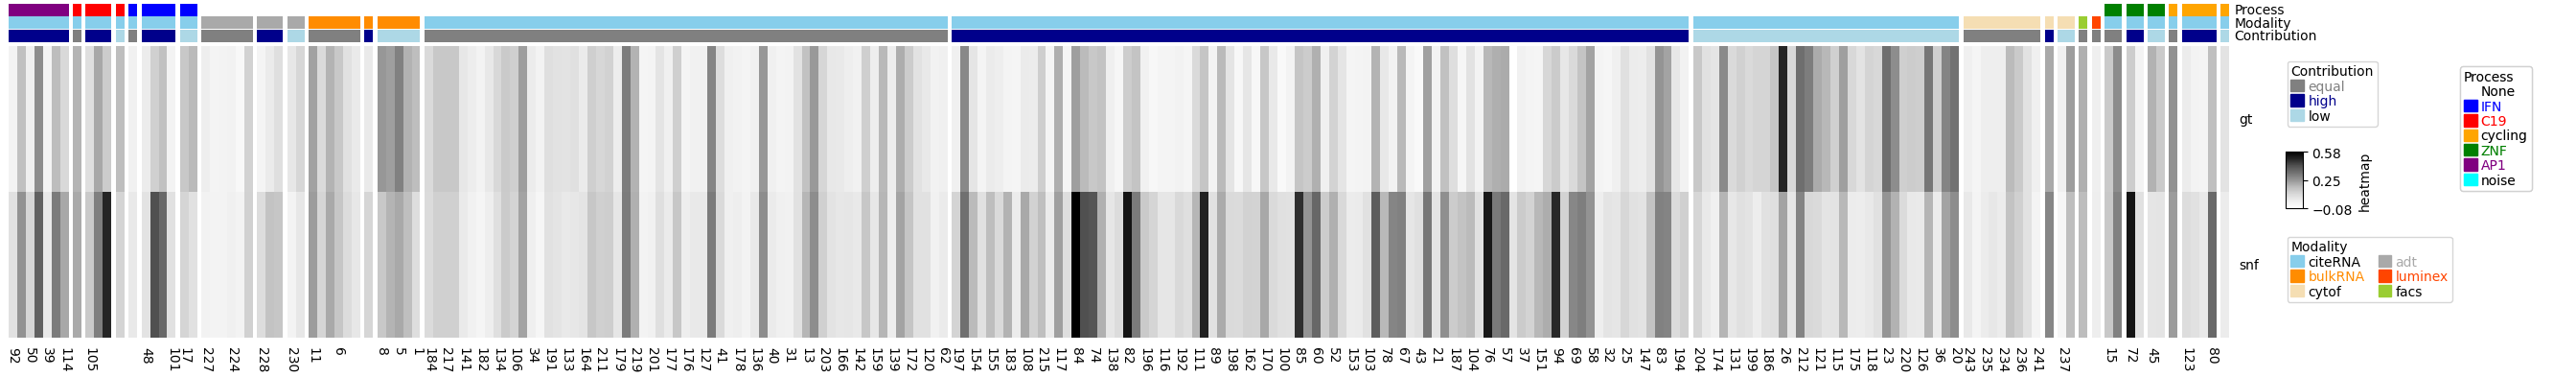

In [27]:
number_to_modality = {}
number_to_module = {}
number_to_contribution = {}
number_to_cell_type = {}
number_to_process = {}




for i, id in enumerate(level1_graphs.keys()):

    number_to_modality[i] = level1_graphs[id].uns["modality"]
    number_to_module[i] = level1_graphs[id].uns["module"]
    number_to_contribution[i] = contribution[i]
    number_to_process[i] = level1_graphs[id].uns["process"]
    number_to_cell_type[i] = level1_graphs[id].uns["cell-type"]



df_column = pd.DataFrame(number_to_modality.values(), columns=["modality"] ).join(pd.DataFrame(number_to_contribution.values(), columns=["contribution"])).join(pd.DataFrame(number_to_process.values(), columns=["process"]))


col_colors_dict = {"process":{"None": "white", "IFN": "blue", "C19": "red", "cycling": "orange", "ZNF": "green", "AP1": "purple", "noise": "cyan" },
                  "modality":{"citeRNA":"skyblue", "bulkRNA": "darkorange" , "cytof": "wheat", "adt": "darkgray", "luminex": "orangered", "facs": "yellowgreen"},
                  "contribution":{"equal": "grey", "high": "darkblue", "low":"lightblue"}  }


col_ha= HeatmapAnnotation(Process=anno_simple(df_column.process,colors=col_colors_dict['process'],rasterized=True),
                          Modality=anno_simple(df_column.modality,colors=col_colors_dict['modality'],rasterized=True),
                          Contribution=anno_simple(df_column.contribution,colors=col_colors_dict['contribution'],rasterized=True),
                          axis=1)


fig, ax = plt.subplots(figsize=(30,4))
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"],  columns = list(number_to_modality.keys())) # Data Frame containing normalized data for each score
ami_kernel_plt = ClusterMapPlotter(df, top_annotation=col_ha,
                     show_rownames=True,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ['process', 'modality', 'contribution']],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8, row_split_gap=1.2 )

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


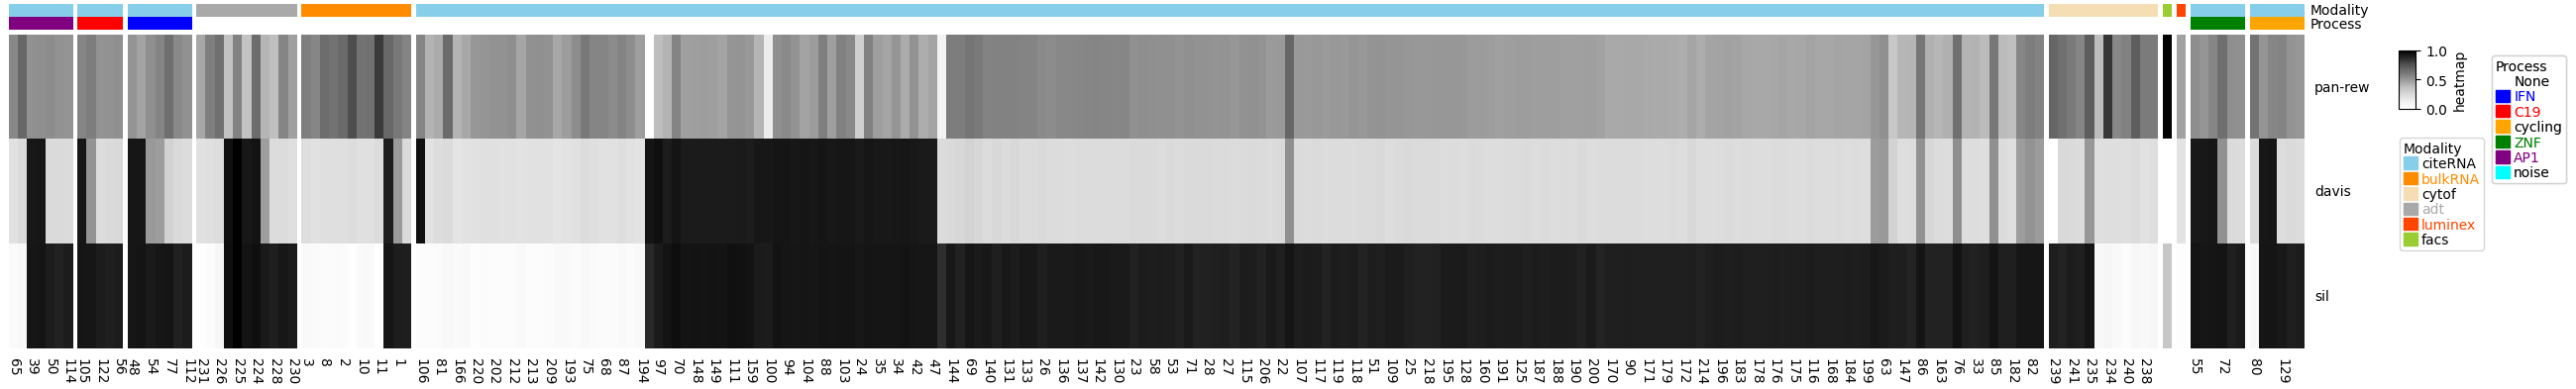

In [43]:
col_colors_dict = {"process":{"None": "white", "IFN": "blue", "C19": "red", "cycling": "orange", "ZNF": "green", "AP1": "purple", "noise": "cyan" },
                  "modality":{"citeRNA":"skyblue", "bulkRNA": "darkorange" , "cytof": "wheat", "adt": "darkgray", "luminex": "orangered", "facs": "yellowgreen"} }


col_ha= HeatmapAnnotation(Modality=anno_simple(df_column.modality,colors=col_colors_dict['modality'],rasterized=True),
                          Process=anno_simple(df_column.process,colors=col_colors_dict['process'],rasterized=True),
                          axis=1)

fig, ax = plt.subplots(figsize=(30,4))
df = pd.DataFrame(min_max_scalar.fit_transform(df_kernel), index = list(number_to_module.keys()), columns = df_kernel.columns) # Data Frame containing normalized data for each score
ami_kernel_plt = ClusterMapPlotter(df.transpose(), top_annotation=col_ha,
                     show_rownames=True,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ['process', 'modality']],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8, row_split_gap=1.2 )

### SNF - Corr - SC

In [28]:
tm = make_transition_matrix(fused_corrs_level1)
fused_rw_score = random_walker_objective(tm)[2]

fused_silhouette_score = skl.metrics.silhouette_score(fused_corrs_level1, labels_level1["labels_fused_corrs"])
fused_davies_bouldin_score = skl.metrics.davies_bouldin_score(fused_corrs_level1, labels_level1["labels_fused_corrs"])

In [30]:
silhouette_dict_corr  = {}
davies_bouldin_corr = {}
score_corr = {}

for i, k in enumerate(level1_graphs.keys()):
    print(i, "/", len(level1_graphs))
    loo = correlations_level1.copy()
    loo.pop(k)

    loo_fused = compute.snf(list(loo.values()), K=6, t = 50)

    tm = make_transition_matrix(loo_fused)
    loo_rw_score = random_walker_objective(tm)[2]

    first, second = compute.get_n_clusters(loo_fused)
    loo_labels = cluster.spectral_clustering(loo_fused, n_clusters=first, n_init = 30)

    loo_silhouette_score = skl.metrics.silhouette_score(loo_fused, loo_labels)
    loo_davies_bouldin_score = skl.metrics.davies_bouldin_score(loo_fused, loo_labels)

    if loo_silhouette_score > fused_silhouette_score:
        silhouette_dict_corr[k] = -abs(fused_silhouette_score - loo_silhouette_score )
    else:
        silhouette_dict_corr[k] =  abs(fused_silhouette_score - loo_silhouette_score )


    if loo_davies_bouldin_score < fused_davies_bouldin_score:
        davies_bouldin_corr[k] = -abs(fused_davies_bouldin_score - loo_davies_bouldin_score )
    else:
        davies_bouldin_corr[k] =  abs(fused_davies_bouldin_score - loo_davies_bouldin_score )

    
    if loo_rw_score > fused_rw_score:
       score_corr[k] = -abs(loo_rw_score - fused_rw_score )
    else:
        score_corr[k] =  abs(loo_rw_score - fused_rw_score )

0 / 246
1 / 246
2 / 246


KeyboardInterrupt: 

<Axes: >

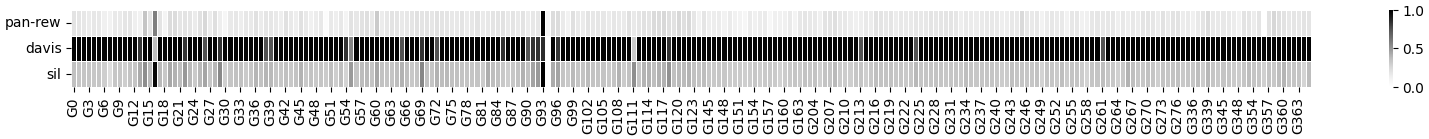

In [ ]:
df_score = pd.DataFrame.from_dict(score_corr, orient="index")
df_davis = pd.DataFrame.from_dict(davies_bouldin_corr, orient="index")
df_sil = pd.DataFrame.from_dict(silhouette_dict_corr, orient="index")
df_kernel = df_score.join(df_davis, rsuffix="davis", lsuffix="pan-rew").join(df_sil, rsuffix="sil")

df_kernel.rename(columns={"0pan-rew":"pan-rew", "0davis":"davis", 0: "sil"}, inplace=True)
df_kernel = pd.DataFrame(min_max_scalar.fit_transform(df_kernel), index = df_kernel.index, columns = df_kernel.columns) # Data Frame containing normalized data for each score

fig, ax = plt.subplots(figsize=(20,1))
sb.heatmap(df_kernel.transpose(), linewidth=.5, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})

<Axes: >

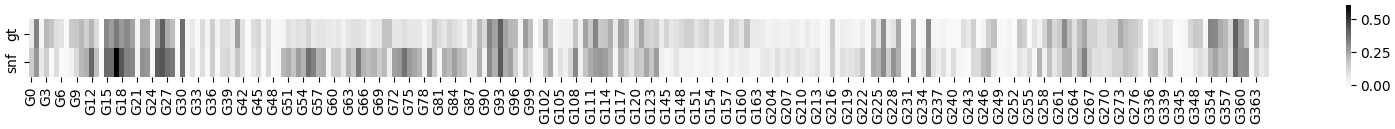

In [32]:
corr_labels = {"ground_truth": list(ground_truth_d.values()), "snf": labels_level1["labels_fused_corrs"] } 
for name in list(level1_graphs.keys()):
    g = correlations_level1[name]
    g = min_max_scalar.fit_transform(g)
 
    first, second = compute.get_n_clusters(g)
    l = cluster.spectral_clustering(g, n_clusters=first, n_init = 40)
    
    corr_labels[name] = l


ami_corr = []
for k1 in list(corr_labels.keys())[:2]:
    g1 = corr_labels[k1]
    ami_with_g1 = []
    for k2 in list(corr_labels.keys())[2:]:
        g2 = corr_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_corr.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_corr, index = ["gt", "snf"], columns = list(level1_graphs.keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

### WA - KNN - Leiden

In [34]:
"""fused_wa = None
for id in knn_PSNs.keys():
    to_add = weights[id] * knn_PSNs[id]
    if np.isnan(to_add).any():
        nan_locs = np.argwhere(np.isnan(to_add))
        for loc in nan_locs:
            to_add[loc[0], loc[1]] = 0

    if fused_wa is None:
        fused_wa = to_add
    else:
        fused_wa = fused_wa + to_add

ad_wa_knn =ad.AnnData(fused_wa)
ad_wa_knn.obsp["connectivities"] = fused_wa
scp.tl.leiden(ad_wa_knn, resolution=1, adjacency=fused_wa, directed=False, use_weights=True)
fused_wa_labels = list(ad_wa_knn.obs.leiden)"""


tm = make_transition_matrix(fused_knn_level1)
fused_rw_score = random_walker_objective(tm)[2]

fused_silhouette_score = skl.metrics.silhouette_score(fused_knn_level1, labels_level1["labels_fused_knn"])
fused_davies_bouldin_score = skl.metrics.davies_bouldin_score(fused_knn_level1, labels_level1["labels_fused_knn"])

In [38]:
silhouette_dict_knn  = {}
davies_bouldin_knn = {}
score_knn = {}

for i, k in enumerate(level1_graphs.keys()):
    loo = knn_PSNs_level1.copy()
    loo.pop(k)

    loo_fused = None
    for id in loo.keys():
        to_add =  weights[id] * knn_PSNs_level1[id]
        if np.isnan(to_add).any():
            nan_locs = np.argwhere(np.isnan(to_add))
            for loc in nan_locs:
                to_add[loc[0], loc[1]] = 0

        if loo_fused is None:
            loo_fused = to_add
        else:
            loo_fused = loo_fused + to_add

    ad_wa_knn =ad.AnnData(loo_fused)
    ad_wa_knn.obsp["connectivities"] = loo_fused
    scp.tl.leiden(ad_wa_knn, resolution=1, adjacency=loo_fused, directed=False, use_weights=True)
    loo_labels = list(ad_wa_knn.obs.leiden)


    tm = make_transition_matrix(loo_fused)
    loo_rw_score = random_walker_objective(tm)[2]

    loo_silhouette_score = skl.metrics.silhouette_score(loo_fused, loo_labels)
    loo_davies_bouldin_score = skl.metrics.davies_bouldin_score(loo_fused, loo_labels)

    if loo_silhouette_score > fused_silhouette_score:
        silhouette_dict_knn[k] = -abs(fused_silhouette_score - loo_silhouette_score )
    else:
        silhouette_dict_knn[k] =  abs(fused_silhouette_score - loo_silhouette_score )


    if loo_davies_bouldin_score < fused_davies_bouldin_score:
        davies_bouldin_knn[k] = -abs(fused_davies_bouldin_score - loo_davies_bouldin_score )
    else:
        davies_bouldin_knn[k] =  abs(fused_davies_bouldin_score - loo_davies_bouldin_score )

    
    if loo_rw_score > fused_rw_score:
       score_knn[k] = -abs(loo_rw_score - fused_rw_score )
    else:
        score_knn[k] =  abs(loo_rw_score - fused_rw_score )

<Axes: >

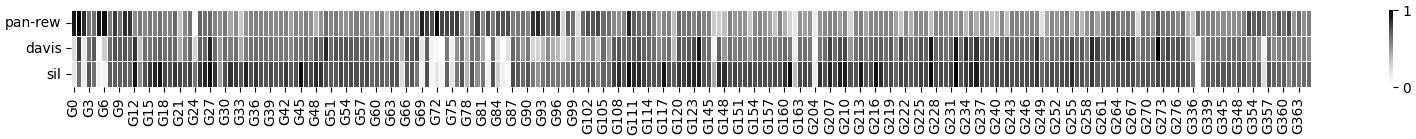

In [39]:
df_score = pd.DataFrame.from_dict(score_knn, orient="index")
df_davis = pd.DataFrame.from_dict(davies_bouldin_knn, orient="index")
df_sil = pd.DataFrame.from_dict(silhouette_dict_knn, orient="index")
df_knn = df_score.join(df_davis, rsuffix="davis", lsuffix="pan-rew").join(df_sil, rsuffix="sil")

df_knn.rename(columns={"0pan-rew":"pan-rew", "0davis":"davis", 0: "sil"}, inplace=True)
df_knn = pd.DataFrame(min_max_scalar.fit_transform(df_knn), index = df_knn.index, columns = df_knn.columns) # Data Frame containing normalized data for each score

fig, ax = plt.subplots(figsize=(20,1))
sb.heatmap(df_knn.transpose(), linewidth=.5, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})


<Axes: >

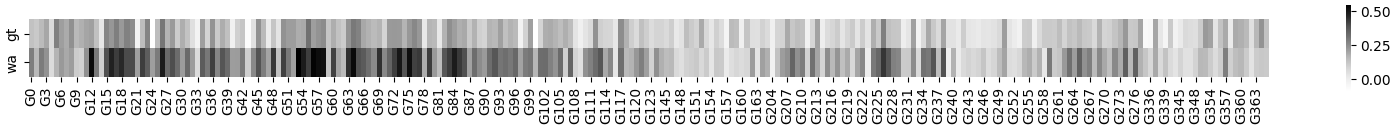

In [41]:
knn_labels = {"ground_truth": list(ground_truth_d.values()), "wa": labels_level1["labels_fused_knn"] } 
for name in list(level1_graphs.keys()):
    knn_labels[name] = labels_knn_leiden["unimodal"][name]


ami_knn = []
for k1 in list(knn_labels.keys())[:2]:
    g1 = knn_labels[k1]
    ami_with_g1 = []
    for k2 in list(knn_labels.keys())[2:]:
        g2 = knn_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_knn.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_knn, index = ["gt", "wa"], columns = list(level1_graphs.keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

# Level2 Contributions

<Axes: >

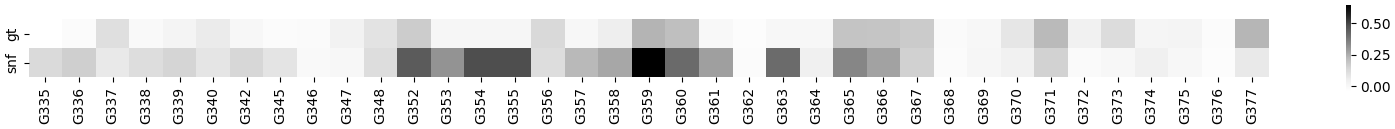

In [42]:
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level2["labels_fused_kernel"]} 
for name in list(level2_graphs.keys()):
    kernel_labels[name] = labels_level2["unimodal_kernel_labels"][name]


ami_kernel = []
for k1 in list(kernel_labels.keys())[:2]:
    g1 = kernel_labels[k1]
    ami_with_g1 = []
    for k2 in list(kernel_labels.keys())[2:]:
        g2 = kernel_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_kernel.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(level2_graphs.keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

In [43]:
contribution_differences = []
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(level2_graphs.keys()))

for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    contribution_differences.append(abs(gt_cont - snf_cont))

tolerance = np.percentile(contribution_differences, 35)
contribution = []


for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    if abs(gt_cont - snf_cont) <= tolerance:
        contribution.append("equal")
    elif gt_cont > snf_cont:
        contribution.append("low")
    elif gt_cont < snf_cont:
        contribution.append("high")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


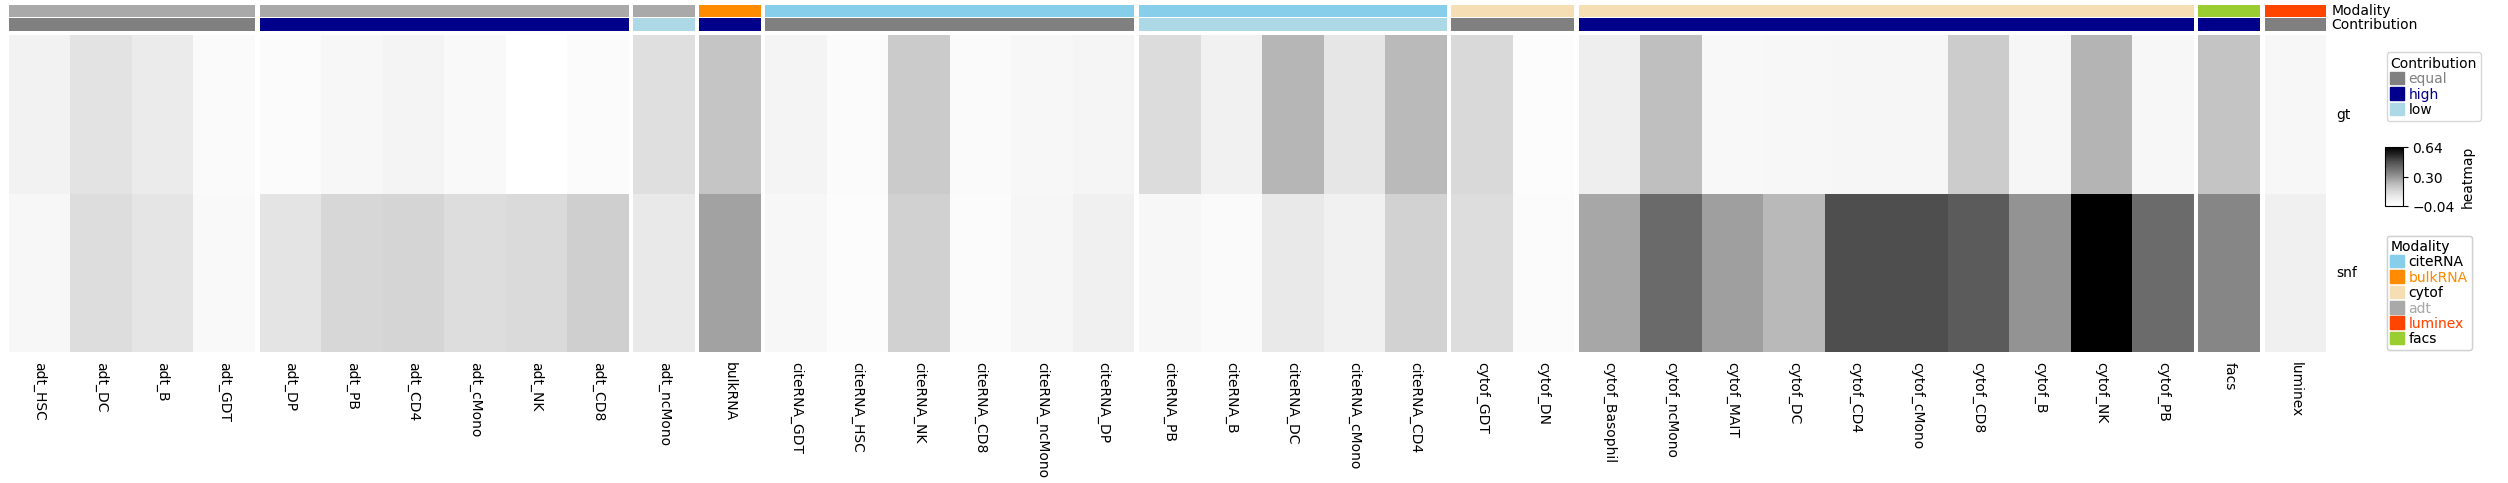

In [55]:
number_to_modality = {}
number_to_contribution = {}
names = []



for i, id in enumerate(level2_graphs.keys()):
    name = id_to_name[id]
    number_to_modality[name] = level2_graphs[id].uns["modality"]
    number_to_contribution[name] = contribution[i]
    names.append(name)
    



df_column = pd.DataFrame(number_to_modality.values(), columns=["modality"], index = list(number_to_modality.keys()) ).join(pd.DataFrame(number_to_contribution.values(), columns=["contribution"], index = list(number_to_modality.keys())))


col_colors_dict = {"modality":{"citeRNA":"skyblue", "bulkRNA": "darkorange" , "cytof": "wheat", "adt": "darkgray", "luminex": "orangered", "facs": "yellowgreen"},
                  "contribution":{"equal": "grey", "high": "darkblue", "low":"lightblue"}}


col_ha= HeatmapAnnotation(Modality=anno_simple(df_column.modality,colors=col_colors_dict['modality'],rasterized=True),
                          Contribution=anno_simple(df_column.contribution,colors=col_colors_dict['contribution'],rasterized=True),
                          axis=1)


fig, ax = plt.subplots(figsize=(30,4))
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"],  columns = list(number_to_modality.keys())) # Data Frame containing normalized data for each score
ami_kernel_plt = ClusterMapPlotter(df, top_annotation=col_ha,
                     show_rownames=True,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ['modality', 'contribution']],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8, row_split_gap=1.2 )

In [53]:
tm = make_transition_matrix(fused_kernel_level2)
fused_rw_score = random_walker_objective(tm)[2]

fused_silhouette_score = skl.metrics.silhouette_score(fused_kernel_level2, labels_level2["labels_fused_kernel"])
fused_davies_bouldin_score = skl.metrics.davies_bouldin_score(fused_kernel_level2, labels_level2["labels_fused_kernel"])


silhouette_dict_kernel  = {}
davies_bouldin_kernel = {}
score_kernel = {}

for i, k in enumerate(level2_graphs.keys()):
    print(i,"/",len(level2_graphs))
    loo = kernel_PSNs_level2.copy()
    loo.pop(k)

    loo_fused = compute.snf(list(loo.values()), K=8, t = 40)

    tm = make_transition_matrix(loo_fused)
    loo_rw_score = random_walker_objective(tm)[2]

    first, second = compute.get_n_clusters(loo_fused)
    loo_labels = cluster.spectral_clustering(loo_fused, n_clusters=first, n_init = 40)

    loo_silhouette_score = skl.metrics.silhouette_score(loo_fused, loo_labels)
    loo_davies_bouldin_score = skl.metrics.davies_bouldin_score(loo_fused, loo_labels)

    if loo_silhouette_score > fused_silhouette_score:
        silhouette_dict_kernel[k] = -abs(fused_silhouette_score - loo_silhouette_score )
    else:
        silhouette_dict_kernel[k] =  abs(fused_silhouette_score - loo_silhouette_score )


    if loo_davies_bouldin_score < fused_davies_bouldin_score:
        davies_bouldin_kernel[k] = -abs(fused_davies_bouldin_score - loo_davies_bouldin_score )
    else:
        davies_bouldin_kernel[k] =  abs(fused_davies_bouldin_score - loo_davies_bouldin_score )

    
    if loo_rw_score > fused_rw_score:
       score_kernel[k] = -abs(loo_rw_score - fused_rw_score )
    else:
        score_kernel[k] =  abs(loo_rw_score - fused_rw_score )

0 / 37
1 / 37
2 / 37
3 / 37
4 / 37
5 / 37
6 / 37
7 / 37
8 / 37
9 / 37
10 / 37
11 / 37
12 / 37
13 / 37
14 / 37
15 / 37
16 / 37
17 / 37
18 / 37
19 / 37
20 / 37
21 / 37
22 / 37
23 / 37
24 / 37
25 / 37
26 / 37
27 / 37
28 / 37
29 / 37
30 / 37
31 / 37
32 / 37
33 / 37
34 / 37
35 / 37
36 / 37


<Axes: >

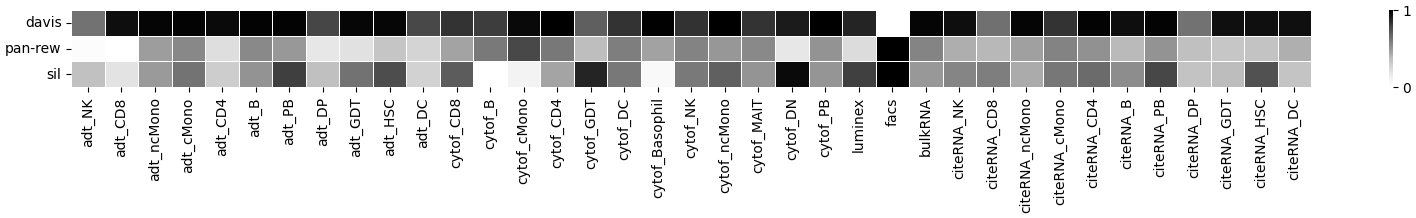

In [56]:
df_score = pd.DataFrame.from_dict(score_kernel, orient="index")
df_davis = pd.DataFrame.from_dict(davies_bouldin_kernel, orient="index")
df_sil = pd.DataFrame.from_dict(silhouette_dict_kernel, orient="index")
df_kernel = df_davis.join(df_score, lsuffix="davis", rsuffix="pan-rew").join(df_sil, rsuffix="sil")

df_kernel.rename(columns={"0pan-rew":"pan-rew", "0davis":"davis", 0: "sil"}, inplace=True)
df_kernel = pd.DataFrame(min_max_scalar.fit_transform(df_kernel), index = names, columns = df_kernel.columns) # Data Frame containing normalized data for each score

fig, ax = plt.subplots(figsize=(20,1))
sb.heatmap(df_kernel.transpose(), linewidth=.5, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})


# Level3-SNF Contributions

<Axes: >

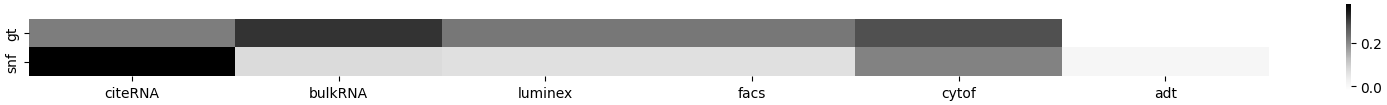

In [60]:
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level3["labels_fused_kernel"]} 
for name in list(labels_level3["unimodal_kernel_labels"].keys()):
    kernel_labels[name] = labels_level3["unimodal_kernel_labels"][name]


ami_kernel = []
for k1 in list(kernel_labels.keys())[:2]:
    g1 = kernel_labels[k1]
    ami_with_g1 = []
    for k2 in list(kernel_labels.keys())[2:]:
        g2 = kernel_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_kernel.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(labels_level3["unimodal_kernel_labels"].keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

In [61]:
contribution_differences = []
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(labels_level3["unimodal_kernel_labels"].keys()))

for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    contribution_differences.append(abs(gt_cont - snf_cont))

tolerance = np.percentile(contribution_differences, 35)
contribution = []


for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    if abs(gt_cont - snf_cont) <= tolerance:
        contribution.append("equal")
    elif gt_cont > snf_cont:
        contribution.append("low")
    elif gt_cont < snf_cont:
        contribution.append("high")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


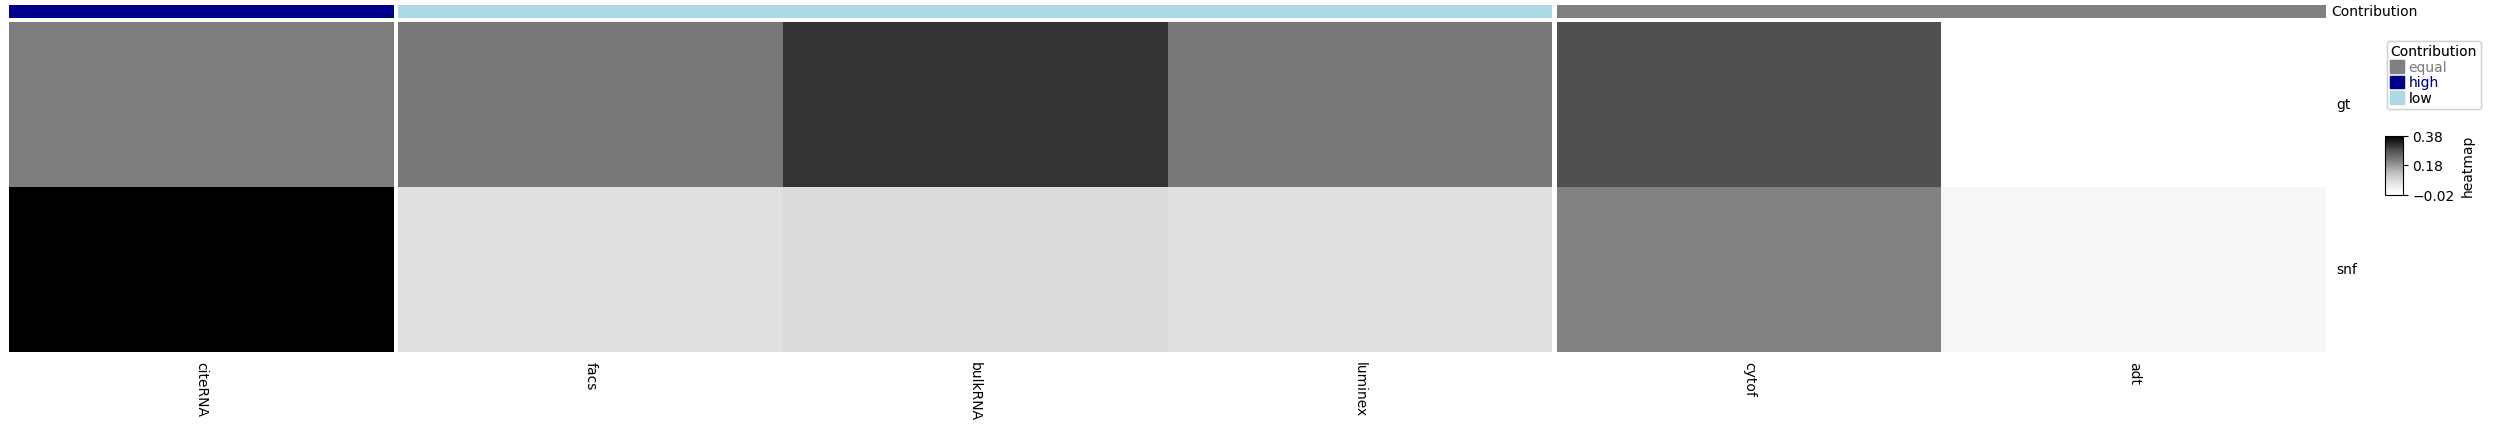

In [66]:
number_to_contribution = {}


for i, id in enumerate(list(labels_level3["unimodal_kernel_labels"].keys())):
    number_to_contribution[id] = contribution[i]

    



df_column = pd.DataFrame(number_to_contribution.values(), columns=["contribution"], index = list(number_to_contribution.keys()))


col_colors_dict = {"contribution":{"equal": "grey", "high": "darkblue", "low":"lightblue"}}


col_ha= HeatmapAnnotation(Contribution=anno_simple(df_column.contribution,colors=col_colors_dict['contribution'],rasterized=True),
                          axis=1)


fig, ax = plt.subplots(figsize=(30,4))
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"],  columns = list(number_to_contribution.keys())) # Data Frame containing normalized data for each score
ami_kernel_plt = ClusterMapPlotter(df, top_annotation=col_ha,
                     show_rownames=True,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ['contribution']],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8, row_split_gap=1.2 )

0 / 6
1 / 6
2 / 6
3 / 6
4 / 6
5 / 6


<Axes: >

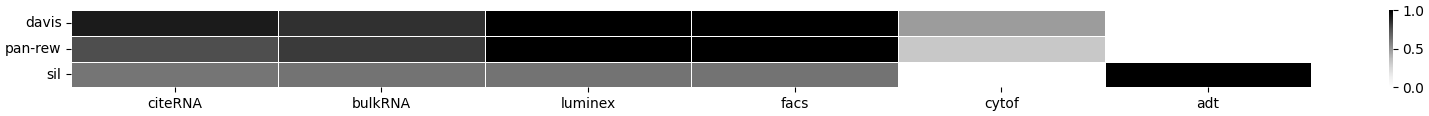

In [68]:
tm = make_transition_matrix(fused_kernel_level3)
fused_rw_score = random_walker_objective(tm)[2]

fused_silhouette_score = skl.metrics.silhouette_score(fused_kernel_level3, labels_level3["labels_fused_kernel"])
fused_davies_bouldin_score = skl.metrics.davies_bouldin_score(fused_kernel_level3, labels_level3["labels_fused_kernel"])


silhouette_dict_kernel  = {}
davies_bouldin_kernel = {}
score_kernel = {}

for i, k in enumerate(list(labels_level3["unimodal_kernel_labels"].keys())):
    print(i,"/",len(list(labels_level3["unimodal_kernel_labels"].keys())))
    loo = kernel_PSNs_level3.copy()
    loo.pop(k)

    loo_fused = compute.snf(list(loo.values()), K=8, t = 40)

    tm = make_transition_matrix(loo_fused)
    loo_rw_score = random_walker_objective(tm)[2]

    first, second = compute.get_n_clusters(loo_fused)
    loo_labels = cluster.spectral_clustering(loo_fused, n_clusters=first, n_init = 40)

    loo_silhouette_score = skl.metrics.silhouette_score(loo_fused, loo_labels)
    loo_davies_bouldin_score = skl.metrics.davies_bouldin_score(loo_fused, loo_labels)

    if loo_silhouette_score > fused_silhouette_score:
        silhouette_dict_kernel[k] = -abs(fused_silhouette_score - loo_silhouette_score )
    else:
        silhouette_dict_kernel[k] =  abs(fused_silhouette_score - loo_silhouette_score )


    if loo_davies_bouldin_score < fused_davies_bouldin_score:
        davies_bouldin_kernel[k] = -abs(fused_davies_bouldin_score - loo_davies_bouldin_score )
    else:
        davies_bouldin_kernel[k] =  abs(fused_davies_bouldin_score - loo_davies_bouldin_score )

    
    if loo_rw_score > fused_rw_score:
       score_kernel[k] = -abs(loo_rw_score - fused_rw_score )
    else:
        score_kernel[k] =  abs(loo_rw_score - fused_rw_score )



df_score = pd.DataFrame.from_dict(score_kernel, orient="index")
df_davis = pd.DataFrame.from_dict(davies_bouldin_kernel, orient="index")
df_sil = pd.DataFrame.from_dict(silhouette_dict_kernel, orient="index")
df_kernel = df_davis.join(df_score, lsuffix="davis", rsuffix="pan-rew").join(df_sil, rsuffix="sil")

df_kernel.rename(columns={"0pan-rew":"pan-rew", "0davis":"davis", 0: "sil"}, inplace=True)
df_kernel = pd.DataFrame(min_max_scalar.fit_transform(df_kernel), index = list(labels_level3["unimodal_kernel_labels"].keys()), columns = df_kernel.columns) # Data Frame containing normalized data for each score

fig, ax = plt.subplots(figsize=(20,1))
sb.heatmap(df_kernel.transpose(), linewidth=.5, cmap="Greys", ax=ax, square=False, cbar_kws = {"shrink": 1})


# Level4 Contributions

<Axes: >

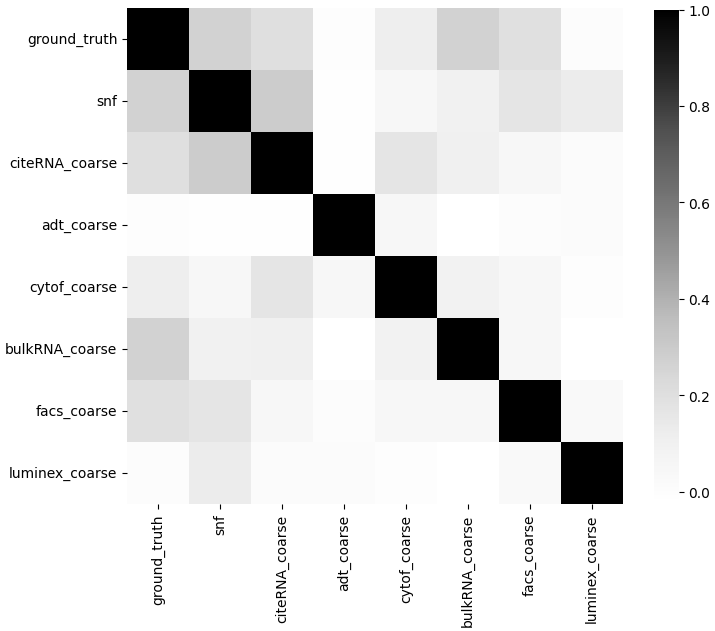

In [80]:
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level4["labels_fused_kernel"]} 
for name in list(labels_level4["unimodal_kernel_labels"].keys()):
    kernel_labels[id_to_name[name]] = labels_level4["unimodal_kernel_labels"][name]


ami_kernel = []
for k1 in list(kernel_labels.keys()):
    g1 = kernel_labels[k1]
    ami_with_g1 = []
    for k2 in list(kernel_labels.keys()):
        g2 = kernel_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_kernel.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(pd.DataFrame(ami_kernel, index = list(kernel_labels.keys()), columns = list(kernel_labels.keys())), ax = ax, cmap = "Greys", square=True, cbar_kws={"shrink": 0.8})

<Axes: >

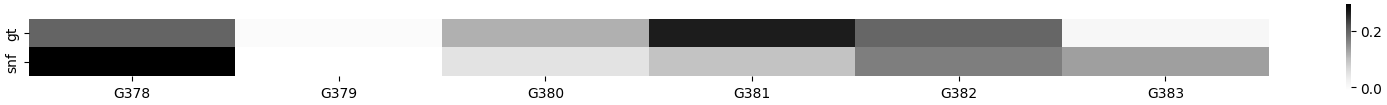

In [69]:
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level4["labels_fused_kernel"]} 
for name in list(labels_level4["unimodal_kernel_labels"].keys()):
    kernel_labels[name] = labels_level4["unimodal_kernel_labels"][name]


ami_kernel = []
for k1 in list(kernel_labels.keys())[:2]:
    g1 = kernel_labels[k1]
    ami_with_g1 = []
    for k2 in list(kernel_labels.keys())[2:]:
        g2 = kernel_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_kernel.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(20,0.75))
sb.heatmap(pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(labels_level4["unimodal_kernel_labels"].keys())), ax = ax, cmap = "Greys", square=False, cbar_kws={"shrink": 1.5})

In [70]:
contribution_differences = []
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"], columns = list(labels_level4["unimodal_kernel_labels"].keys()))

for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    contribution_differences.append(abs(gt_cont - snf_cont))

tolerance = np.percentile(contribution_differences, 35)
contribution = []


for col in df.columns:
    gt_cont = df.loc["gt", col]
    snf_cont = df.loc["snf", col]
    if abs(gt_cont - snf_cont) <= tolerance:
        contribution.append("equal")
    elif gt_cont > snf_cont:
        contribution.append("low")
    elif gt_cont < snf_cont:
        contribution.append("high")

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Plotting legends..


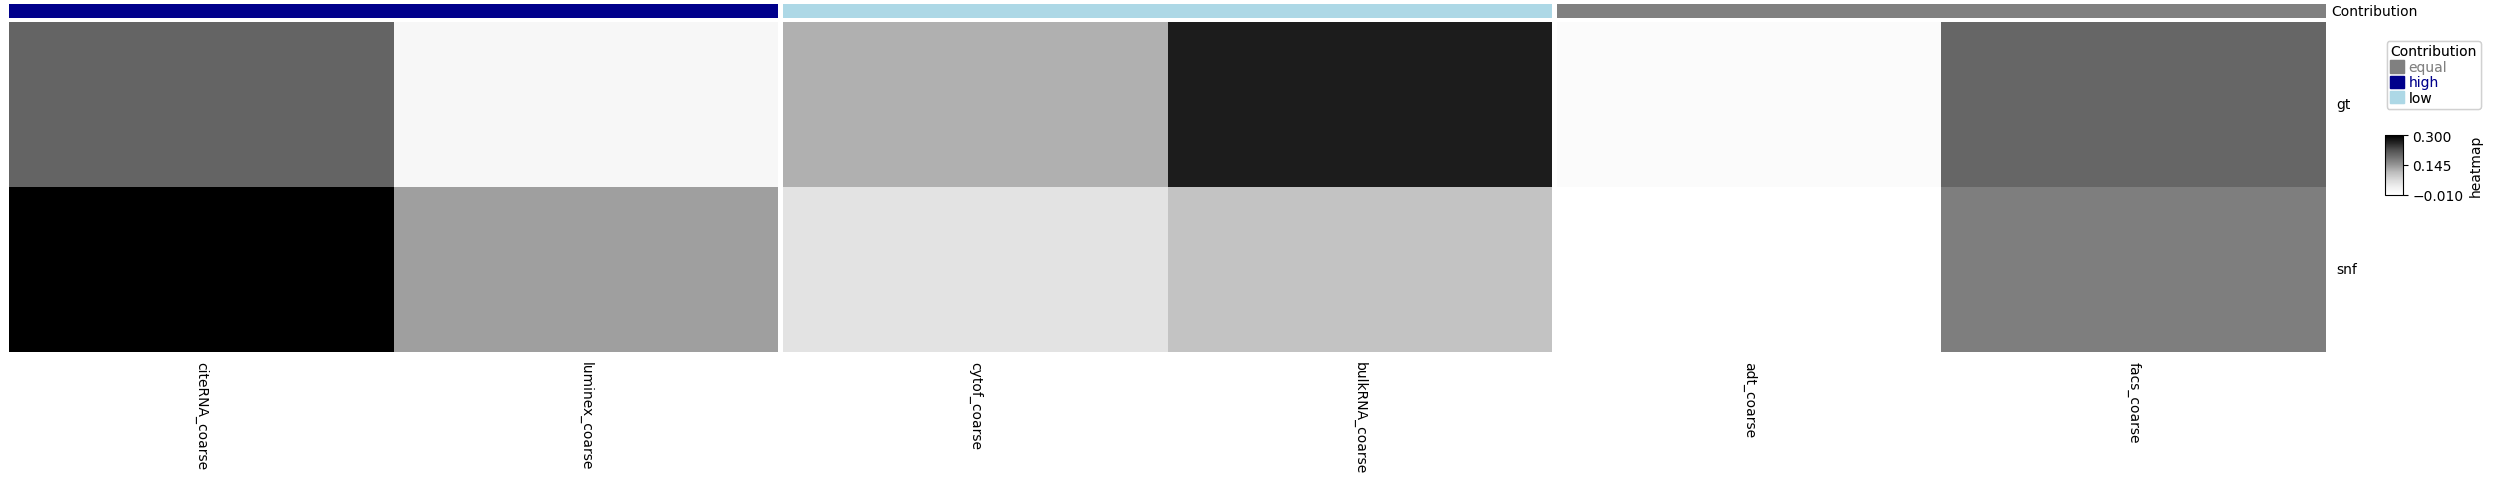

In [73]:
number_to_contribution = {}


for i, id in enumerate(list(labels_level4["unimodal_kernel_labels"].keys())):
    id = id_to_name[id]
    number_to_contribution[id] = contribution[i]



df_column = pd.DataFrame(number_to_contribution.values(), columns=["contribution"], index = list(number_to_contribution.keys()))


col_colors_dict = {"contribution":{"equal": "grey", "high": "darkblue", "low":"lightblue"}}


col_ha= HeatmapAnnotation(Contribution=anno_simple(df_column.contribution,colors=col_colors_dict['contribution'],rasterized=True),
                          axis=1)


fig, ax = plt.subplots(figsize=(30,4))
df = pd.DataFrame(ami_kernel, index = ["gt", "snf"],  columns = list(number_to_contribution.keys())) # Data Frame containing normalized data for each score
ami_kernel_plt = ClusterMapPlotter(df, top_annotation=col_ha,
                     show_rownames=True,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ['contribution']],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8, row_split_gap=1.2 )

# Matrix Similarities

## AMI

### Correlation

In [81]:
"""corr_ami = []

for k1 in list(corr_labels.keys())[2:]:
    g1 = corr_labels[k1]
    ami_with_g1 = []
    for k2 in list(corr_labels.keys())[2:]:
        g2 = corr_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    corr_ami.append(ami_with_g1)

corr_ami = np.array(corr_ami)
corr_ami = min_max_scalar.fit_transform(corr_ami)
corr_ami_with_names = pd.DataFrame(corr_ami, index= list(corr_labels.keys())[2:], columns=list(corr_labels.keys())[2:])
corr_ami = pd.DataFrame(corr_ami)

fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(corr_ami_with_names, ax = ax, cmap = "Greys")"""

NameError: name 'corr_labels_level1' is not defined

### KNN

In [91]:
knn_ami = []

for k1, g1 in labels_knn_leiden["unimodal"].items():
    ami_with_g1 = []
    for k2, g2 in labels_knn_leiden["unimodal"].items():
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    knn_ami.append(ami_with_g1)

knn_ami = np.array(knn_ami)
knn_ami = min_max_scalar.fit_transform(knn_ami)
knn_ami_with_names = pd.DataFrame(knn_ami, index= list(labels_knn_leiden["unimodal"].keys()), columns= list(labels_knn_leiden["unimodal"].keys()))
knn_ami = pd.DataFrame(knn_ami)

<Axes: >

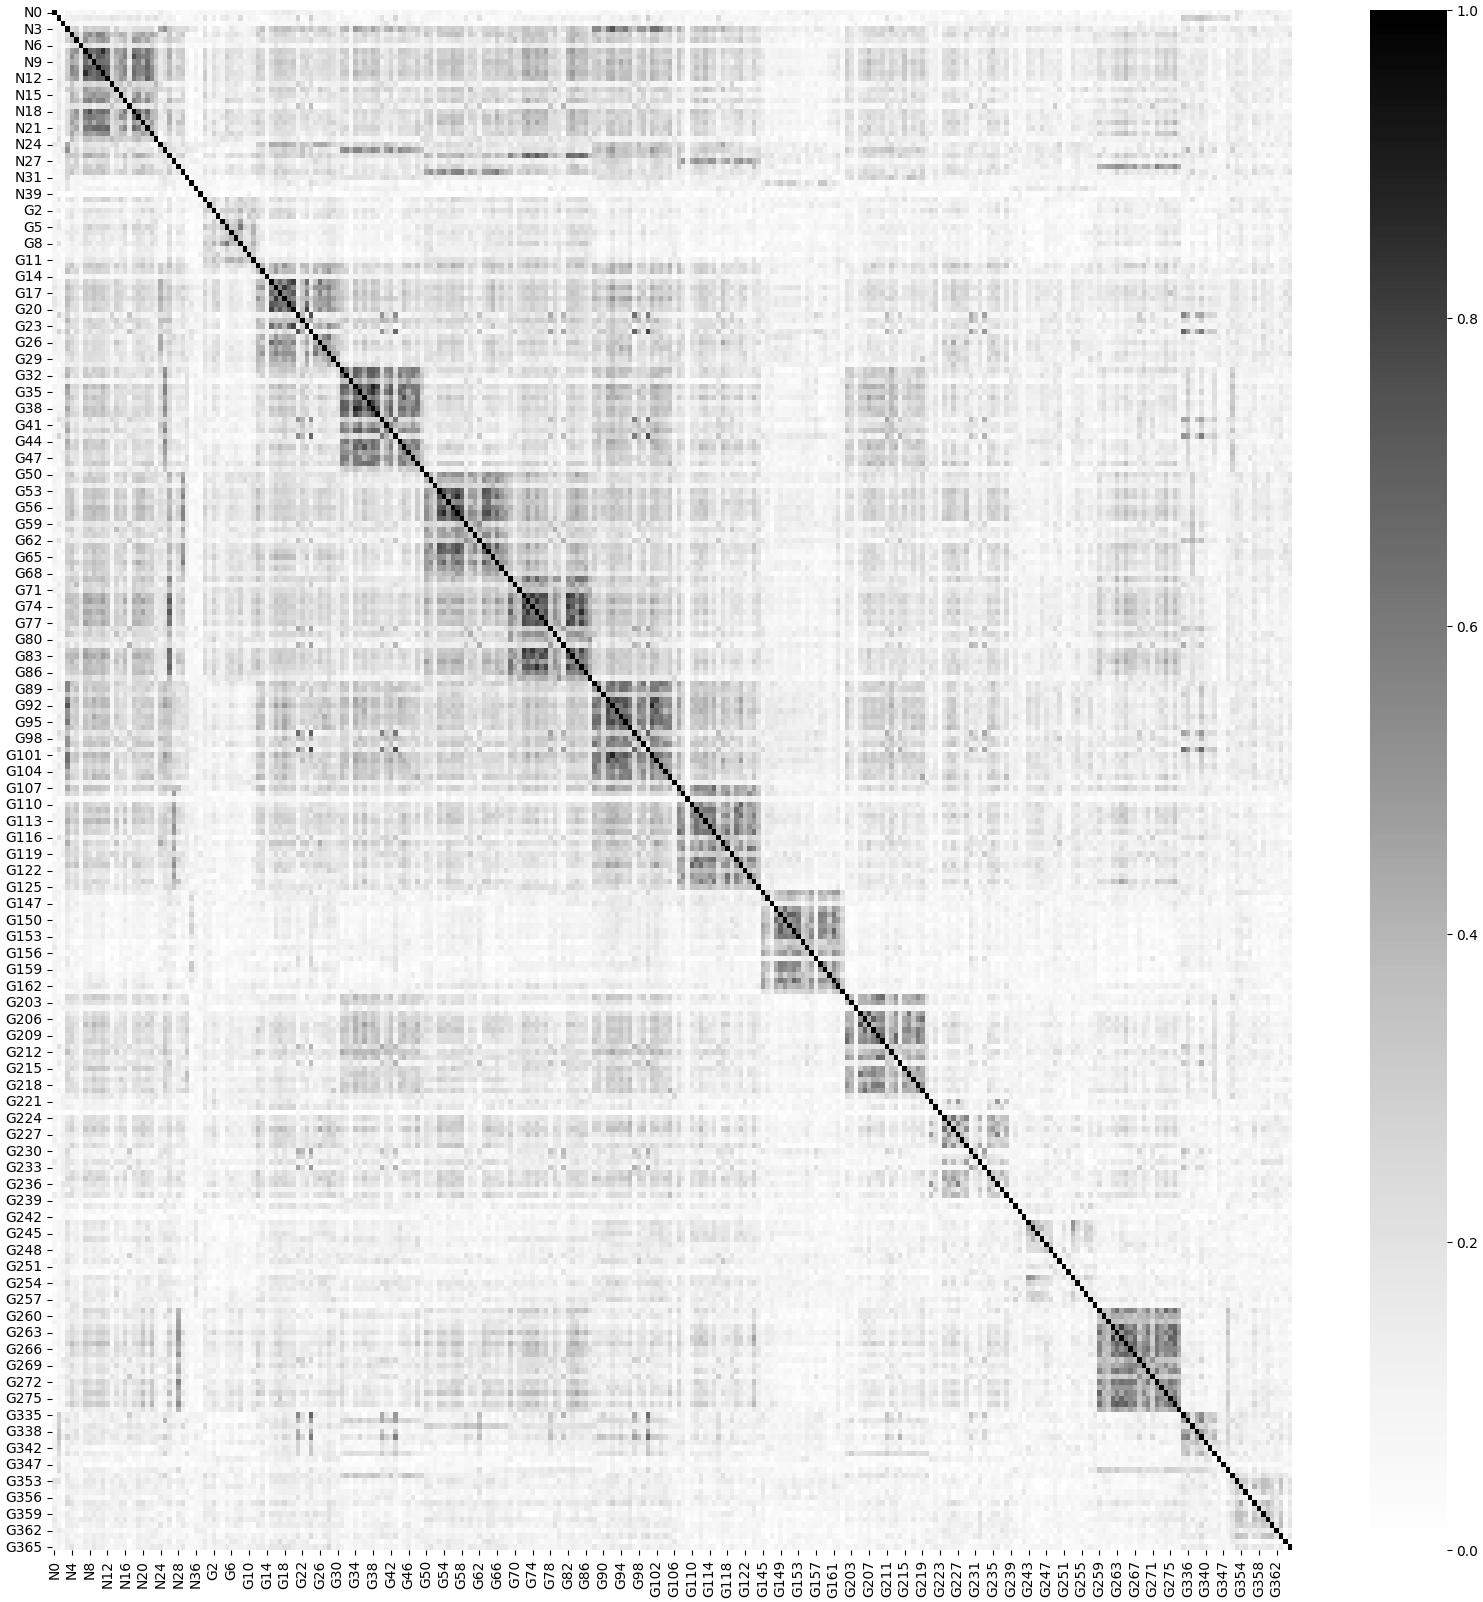

In [92]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(knn_ami_with_names, ax = ax, cmap = "Greys")

### Kernel

In [97]:
kernel_ami = []

for k1, g1 in labels_kernel_sc["unimodal"].items():
    ami_with_g1 = []
    for k2, g2 in labels_kernel_sc["unimodal"].items():
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    kernel_ami.append(ami_with_g1)

kernel_ami = np.array(kernel_ami)
kernel_ami = min_max_scalar.fit_transform(kernel_ami)
kernel_ami_with_names = pd.DataFrame(kernel_ami, index= all_dict["all_names"], columns= all_dict["all_names"])
kernel_ami = pd.DataFrame(kernel_ami)

<Axes: >

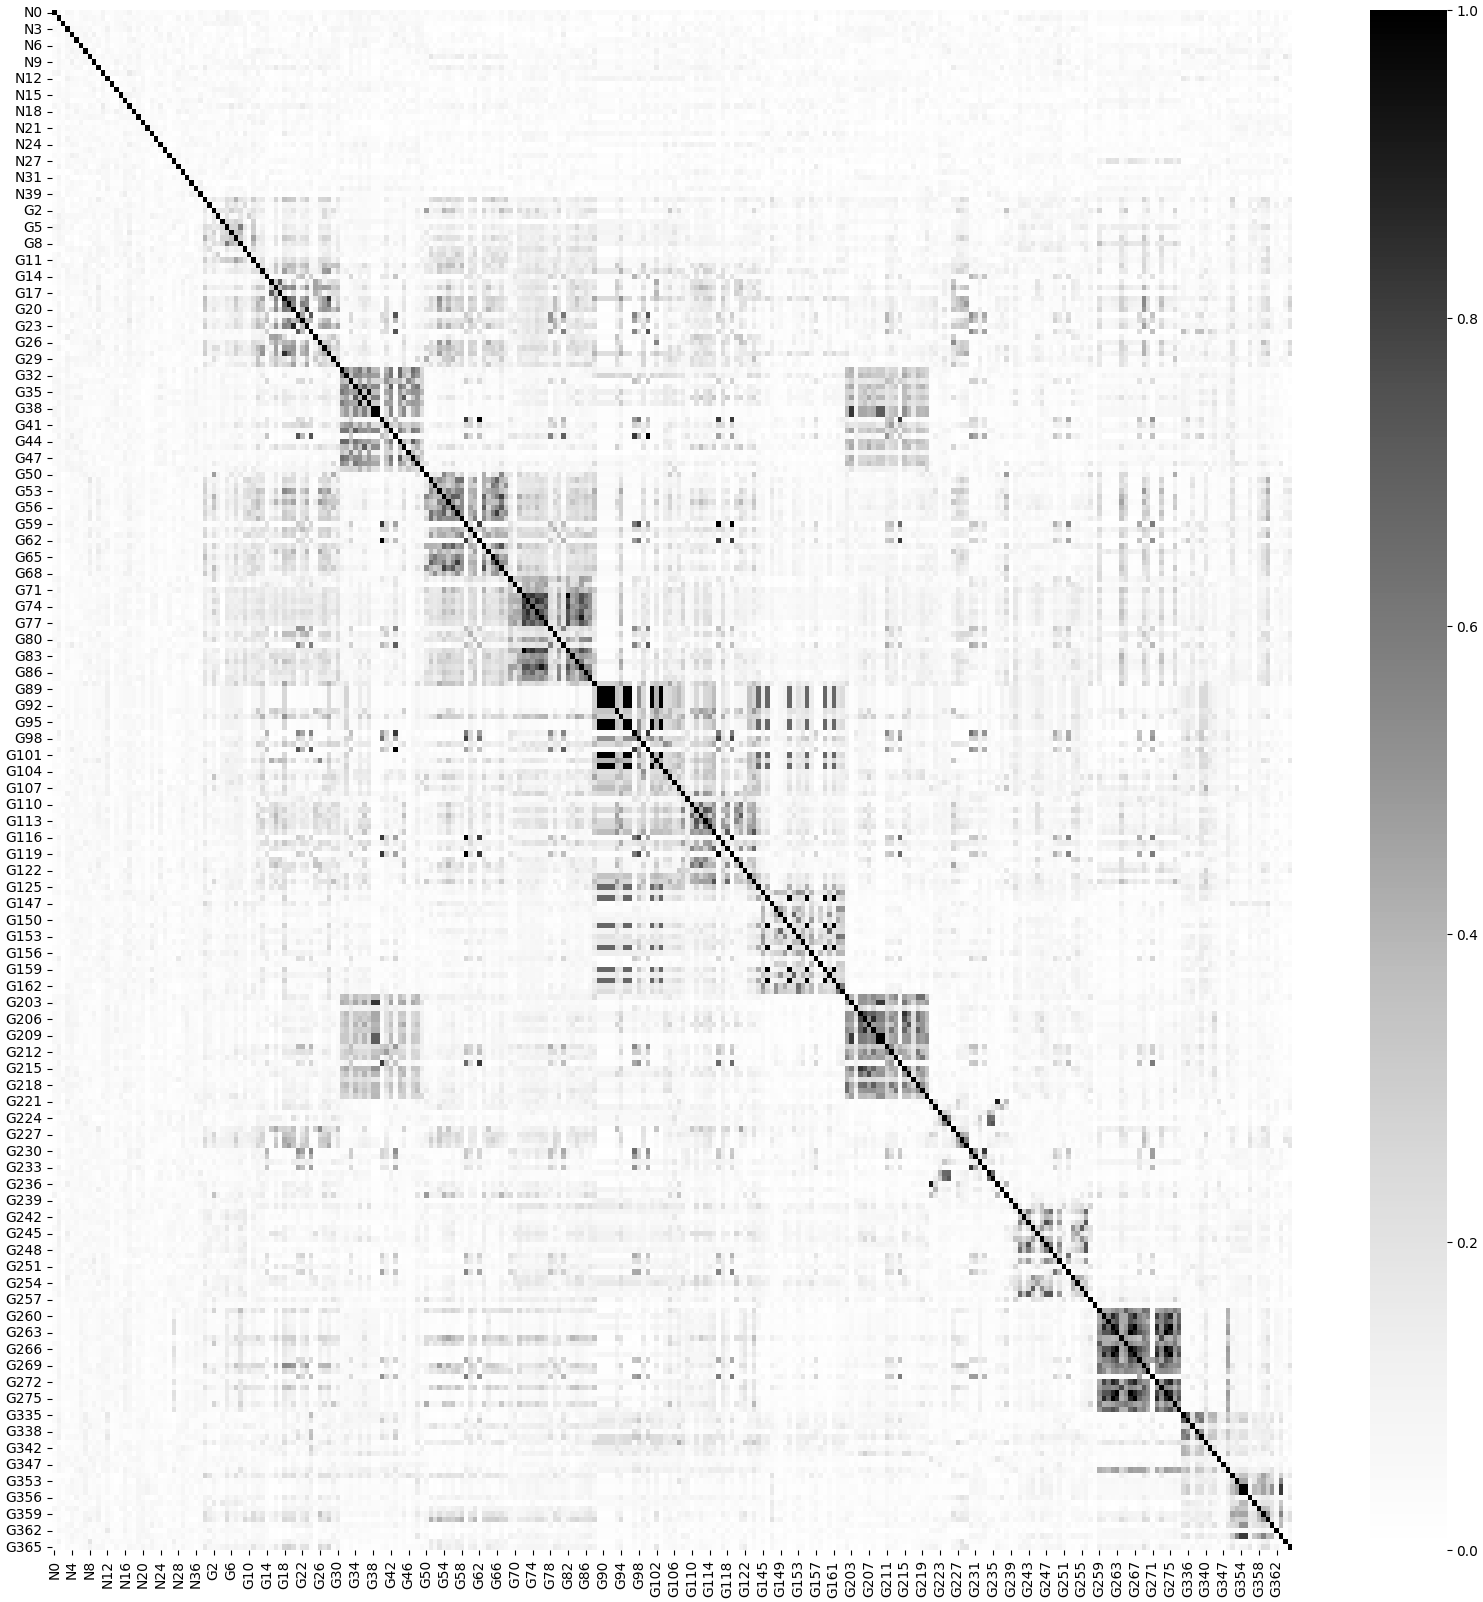

In [98]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(kernel_ami_with_names, ax = ax, cmap = "Greys")

## Forbenius Norm

### Correlation

<Axes: >

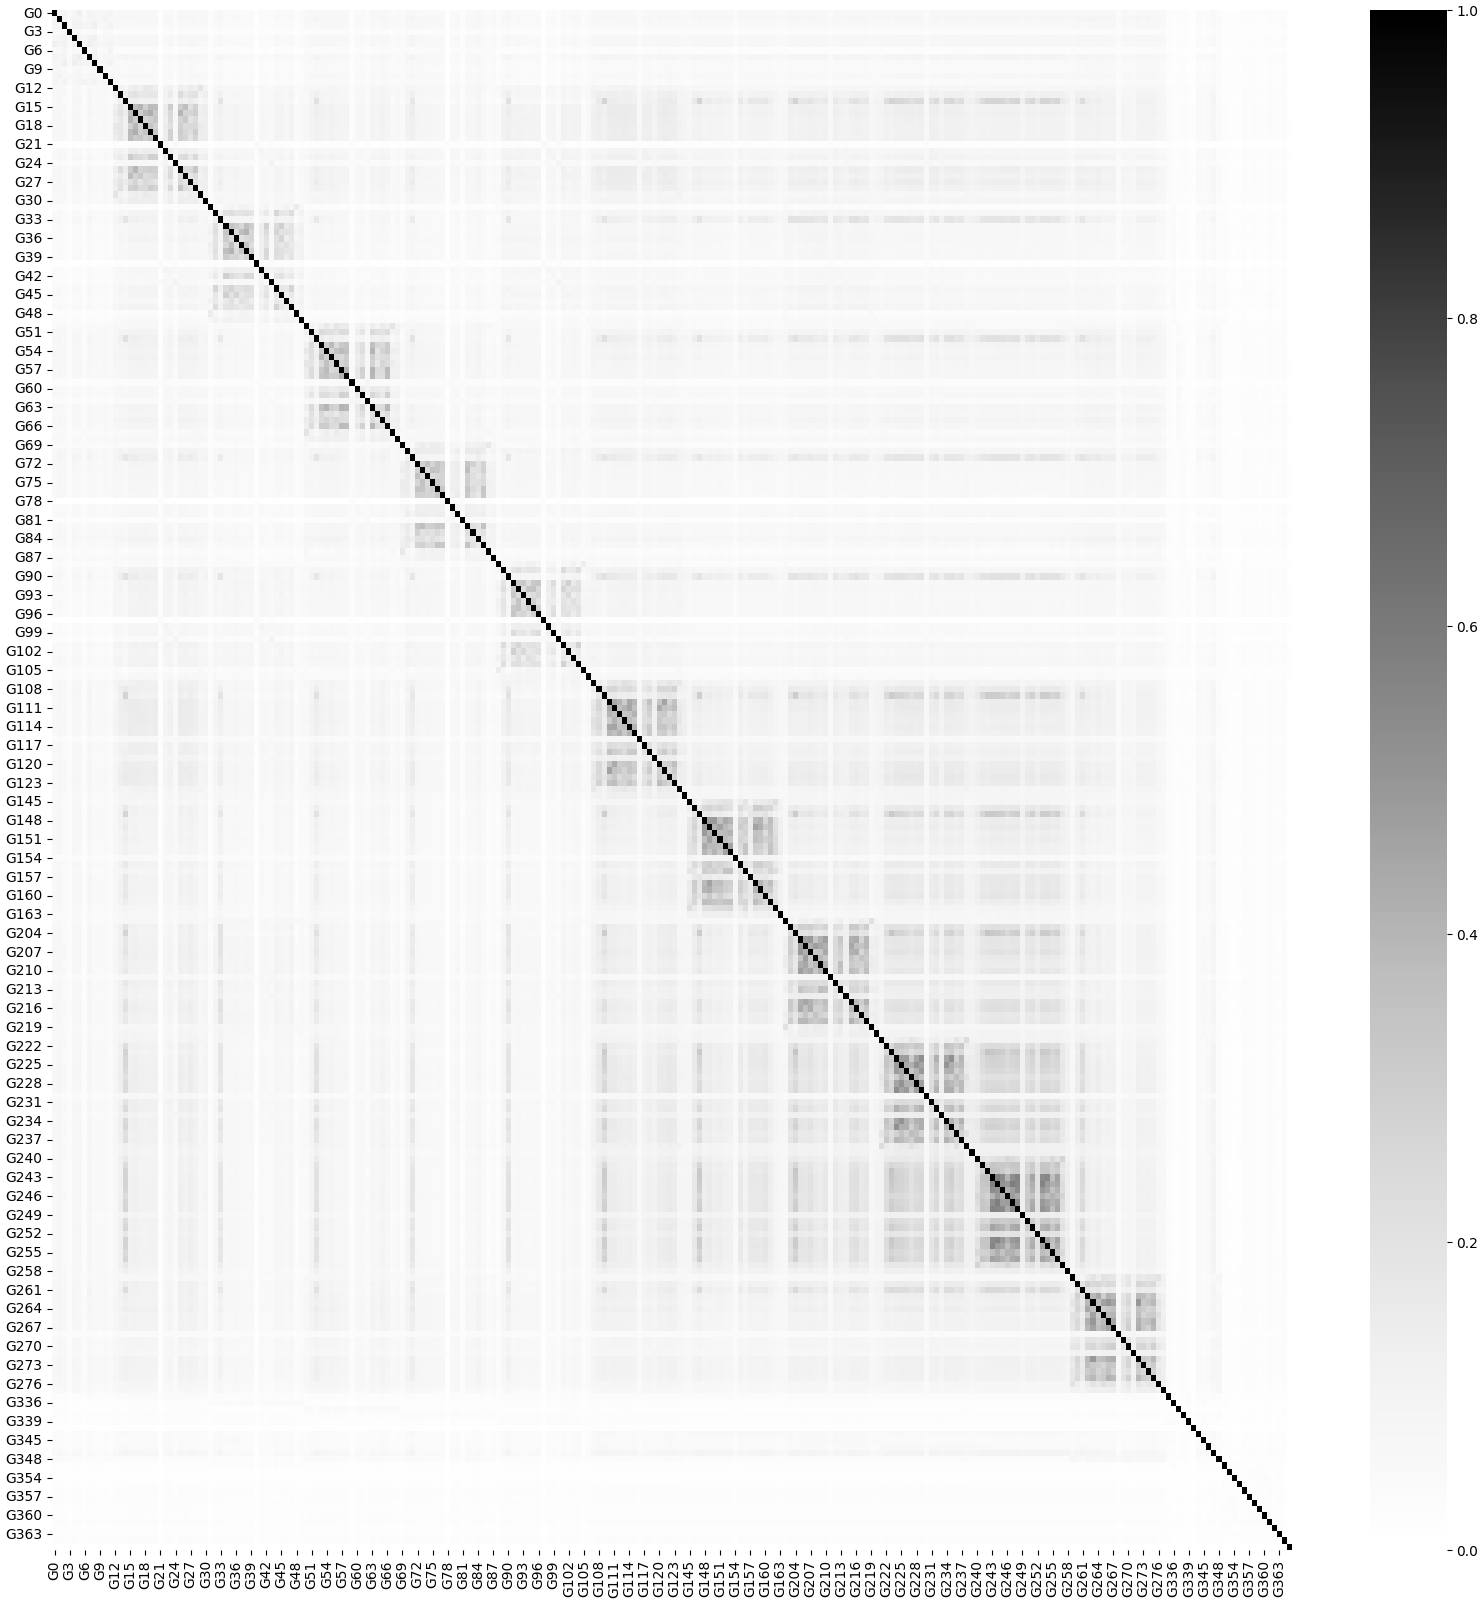

In [103]:
correlation_forb_norm = []

for g1 in correlations_level1.values():
    forb_norm_with_g1 = []
    for g2 in correlations_level1.values():
        diff = g1 - g2
        norm = np.linalg.norm(diff)
        forb_norm_with_g1.append(1/ (1+ norm))

    correlation_forb_norm.append(forb_norm_with_g1)

correlation_forb_norm = np.array(correlation_forb_norm)
correlation_forb_norm = min_max_scalar.fit_transform(correlation_forb_norm)
correlation_forb_norm_with_names = pd.DataFrame(correlation_forb_norm, index= correlations_level1.keys(), columns= correlations_level1.keys())
correlation_forb_norm = pd.DataFrame(correlation_forb_norm)

fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(correlation_forb_norm_with_names, ax = ax, cmap = "Greys")

### KNN

In [106]:
knn_forb_norm = []

for g1 in all_dict["all_psns"]:
    forb_norm_with_g1 = []
    for g2 in all_dict["all_psns"]:
        diff = g1 - g2
        norm = np.linalg.norm(diff)
        forb_norm_with_g1.append(1/ (1+ norm))

    knn_forb_norm.append(forb_norm_with_g1)

knn_forb_norm = np.array(knn_forb_norm)
knn_forb_norm = min_max_scalar.fit_transform(knn_forb_norm)
knn_forb_norm_with_names = pd.DataFrame(knn_forb_norm, index= all_dict["all_names"], columns= all_dict["all_names"])
knn_forb_norm = pd.DataFrame(knn_forb_norm)

<Axes: >

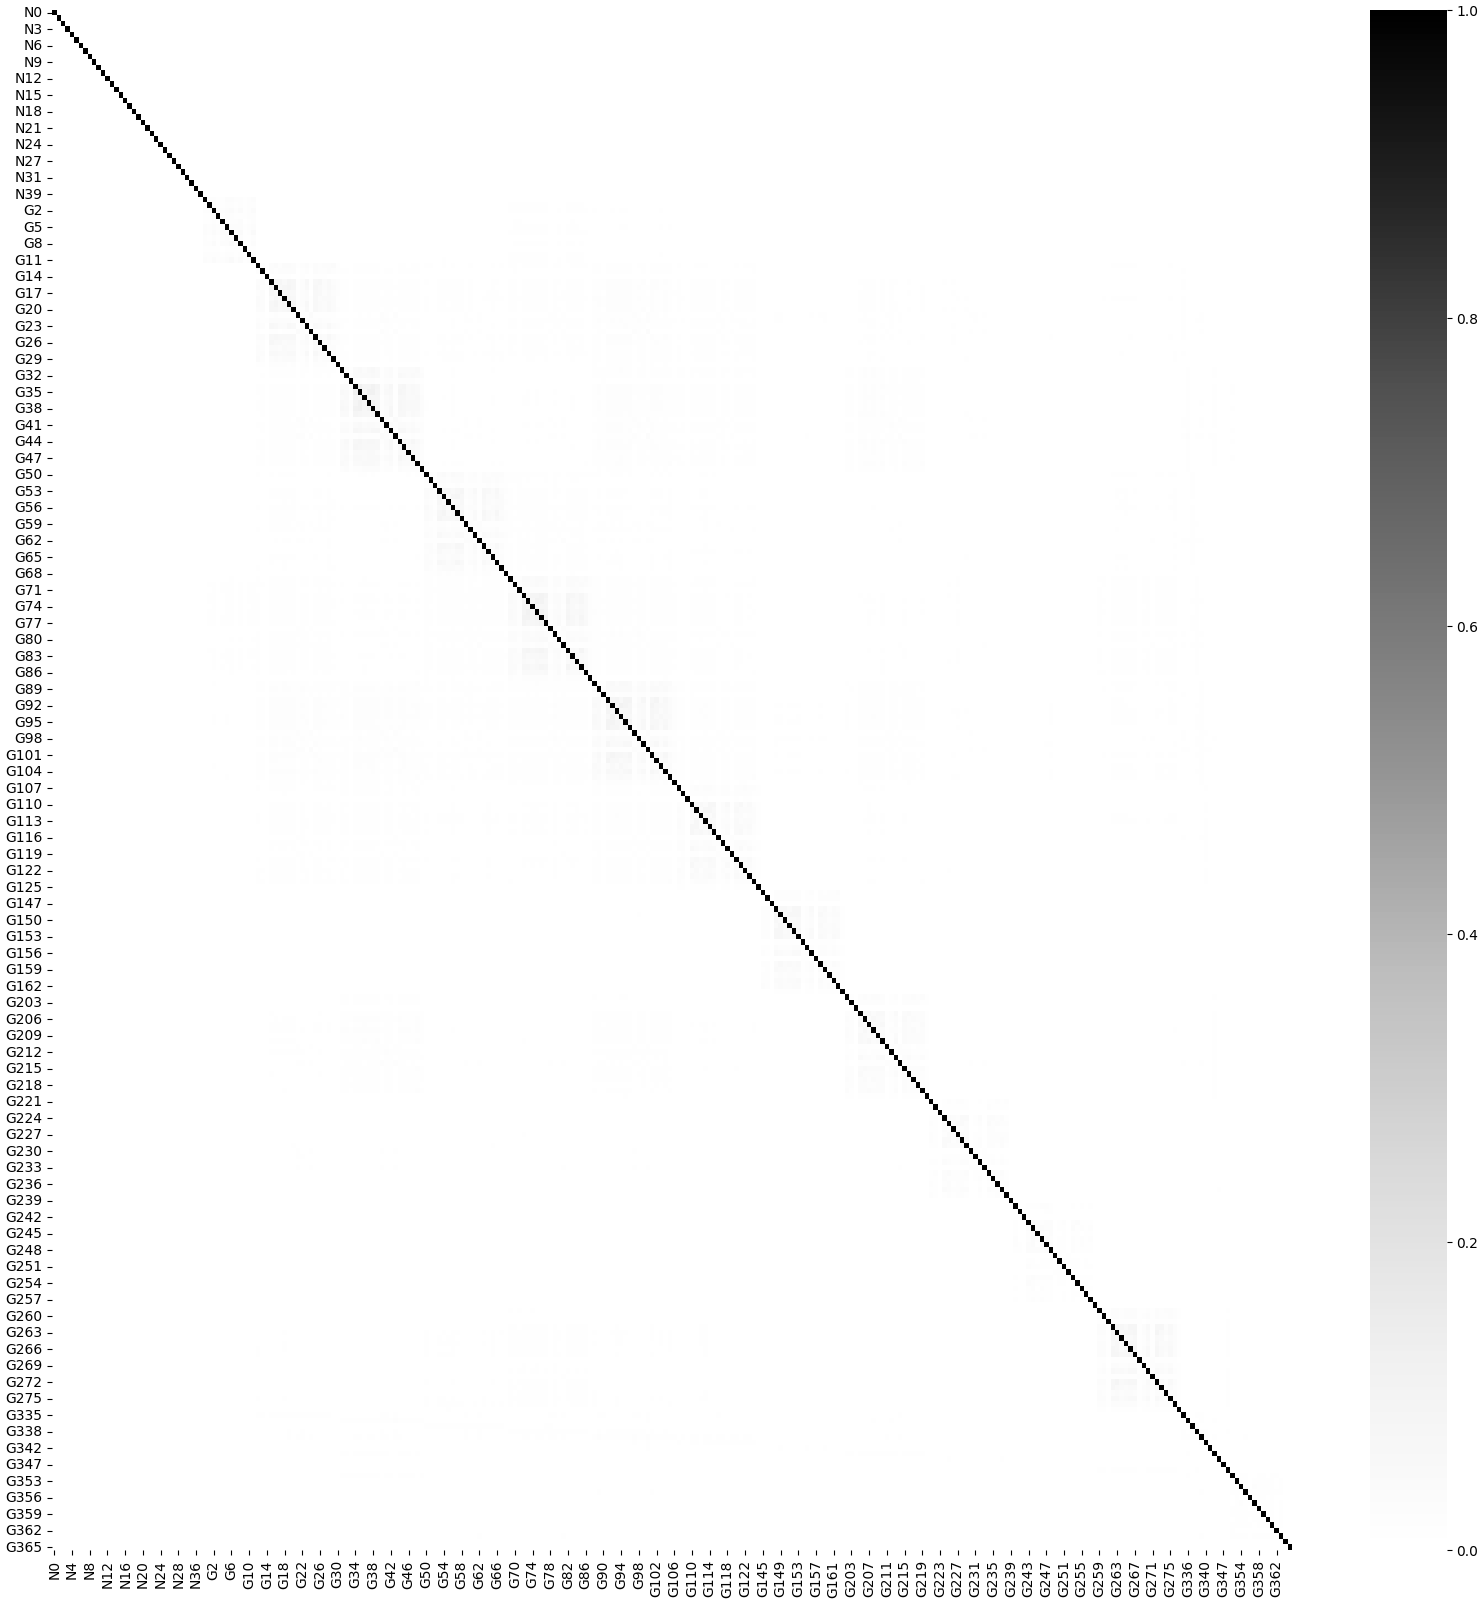

In [107]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(knn_forb_norm_with_names, ax = ax, cmap = "Greys")

### Kernel

In [108]:
kernel_forb_norm = []

for g1 in all_dict["all_affs"]:
    forb_norm_with_g1 = []
    for g2 in all_dict["all_affs"]:
        diff = g1 - g2
        norm = np.linalg.norm(diff)
        forb_norm_with_g1.append(1/ (1+ norm))

    kernel_forb_norm.append(forb_norm_with_g1)

kernel_forb_norm = np.array(kernel_forb_norm)
kernel_forb_norm = min_max_scalar.fit_transform(kernel_forb_norm)
kernel_forb_norm_with_names = pd.DataFrame(kernel_forb_norm, index= all_dict["all_names"], columns= all_dict["all_names"])
kernel_forb_norm = pd.DataFrame(kernel_forb_norm)


<Axes: >

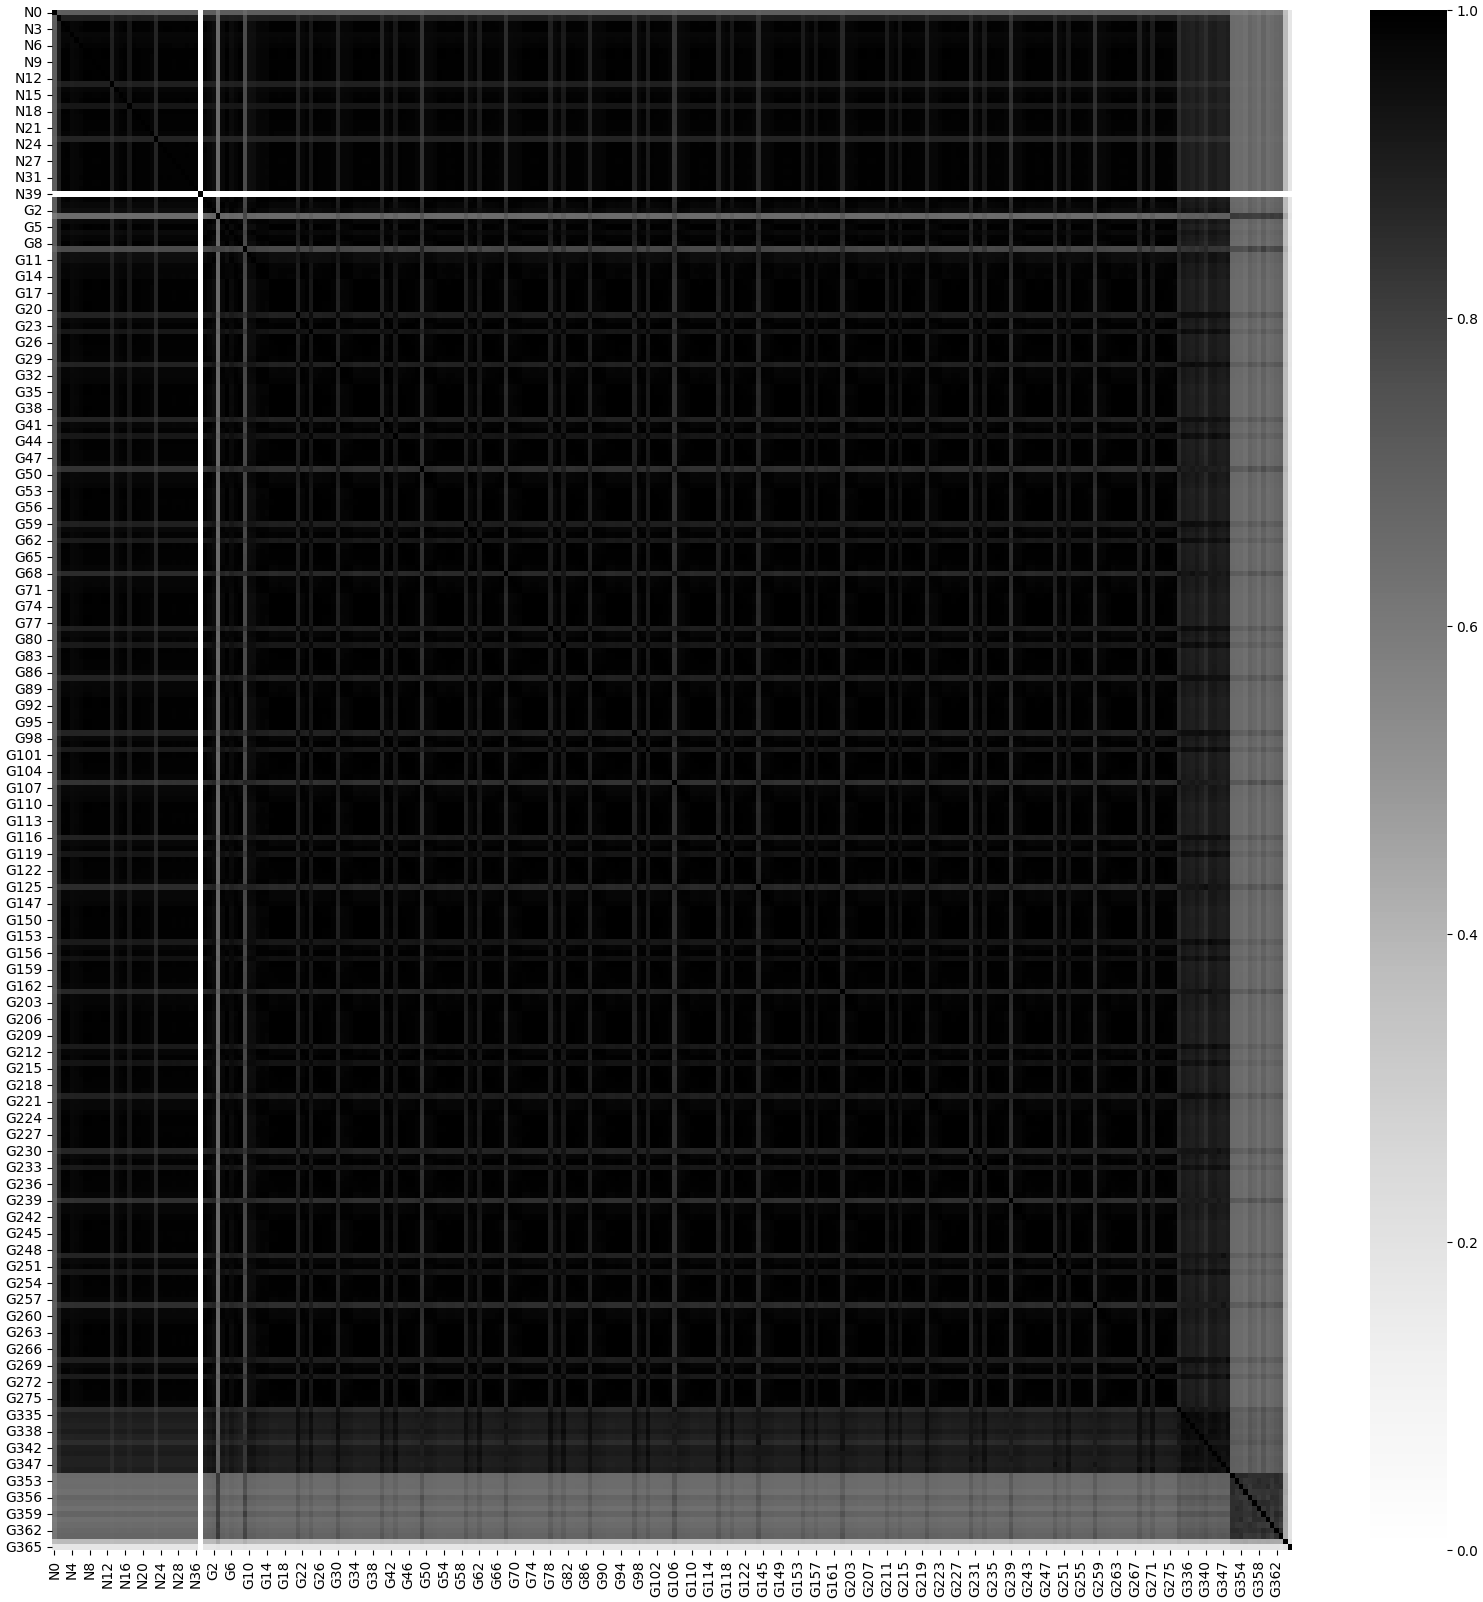

In [109]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(kernel_forb_norm_with_names, ax = ax, cmap = "Greys")

## Correlation

### KNN

In [110]:
knn_corr = []

for g1 in all_dict["all_psns"]:
    corr_with_g1 = []
    g1 = g1.flatten()
    for g2 in all_dict["all_psns"]:
        g2 = g2.flatten()
        pearson = np.corrcoef(g1,g2)[0,1]
        corr_with_g1.append(pearson)
    knn_corr.append(corr_with_g1)

knn_corr = np.array(knn_corr)
knn_corr_with_names = pd.DataFrame(knn_corr, index= all_dict["all_names"], columns= all_dict["all_names"])
knn_corr = pd.DataFrame(knn_corr)

<Axes: >

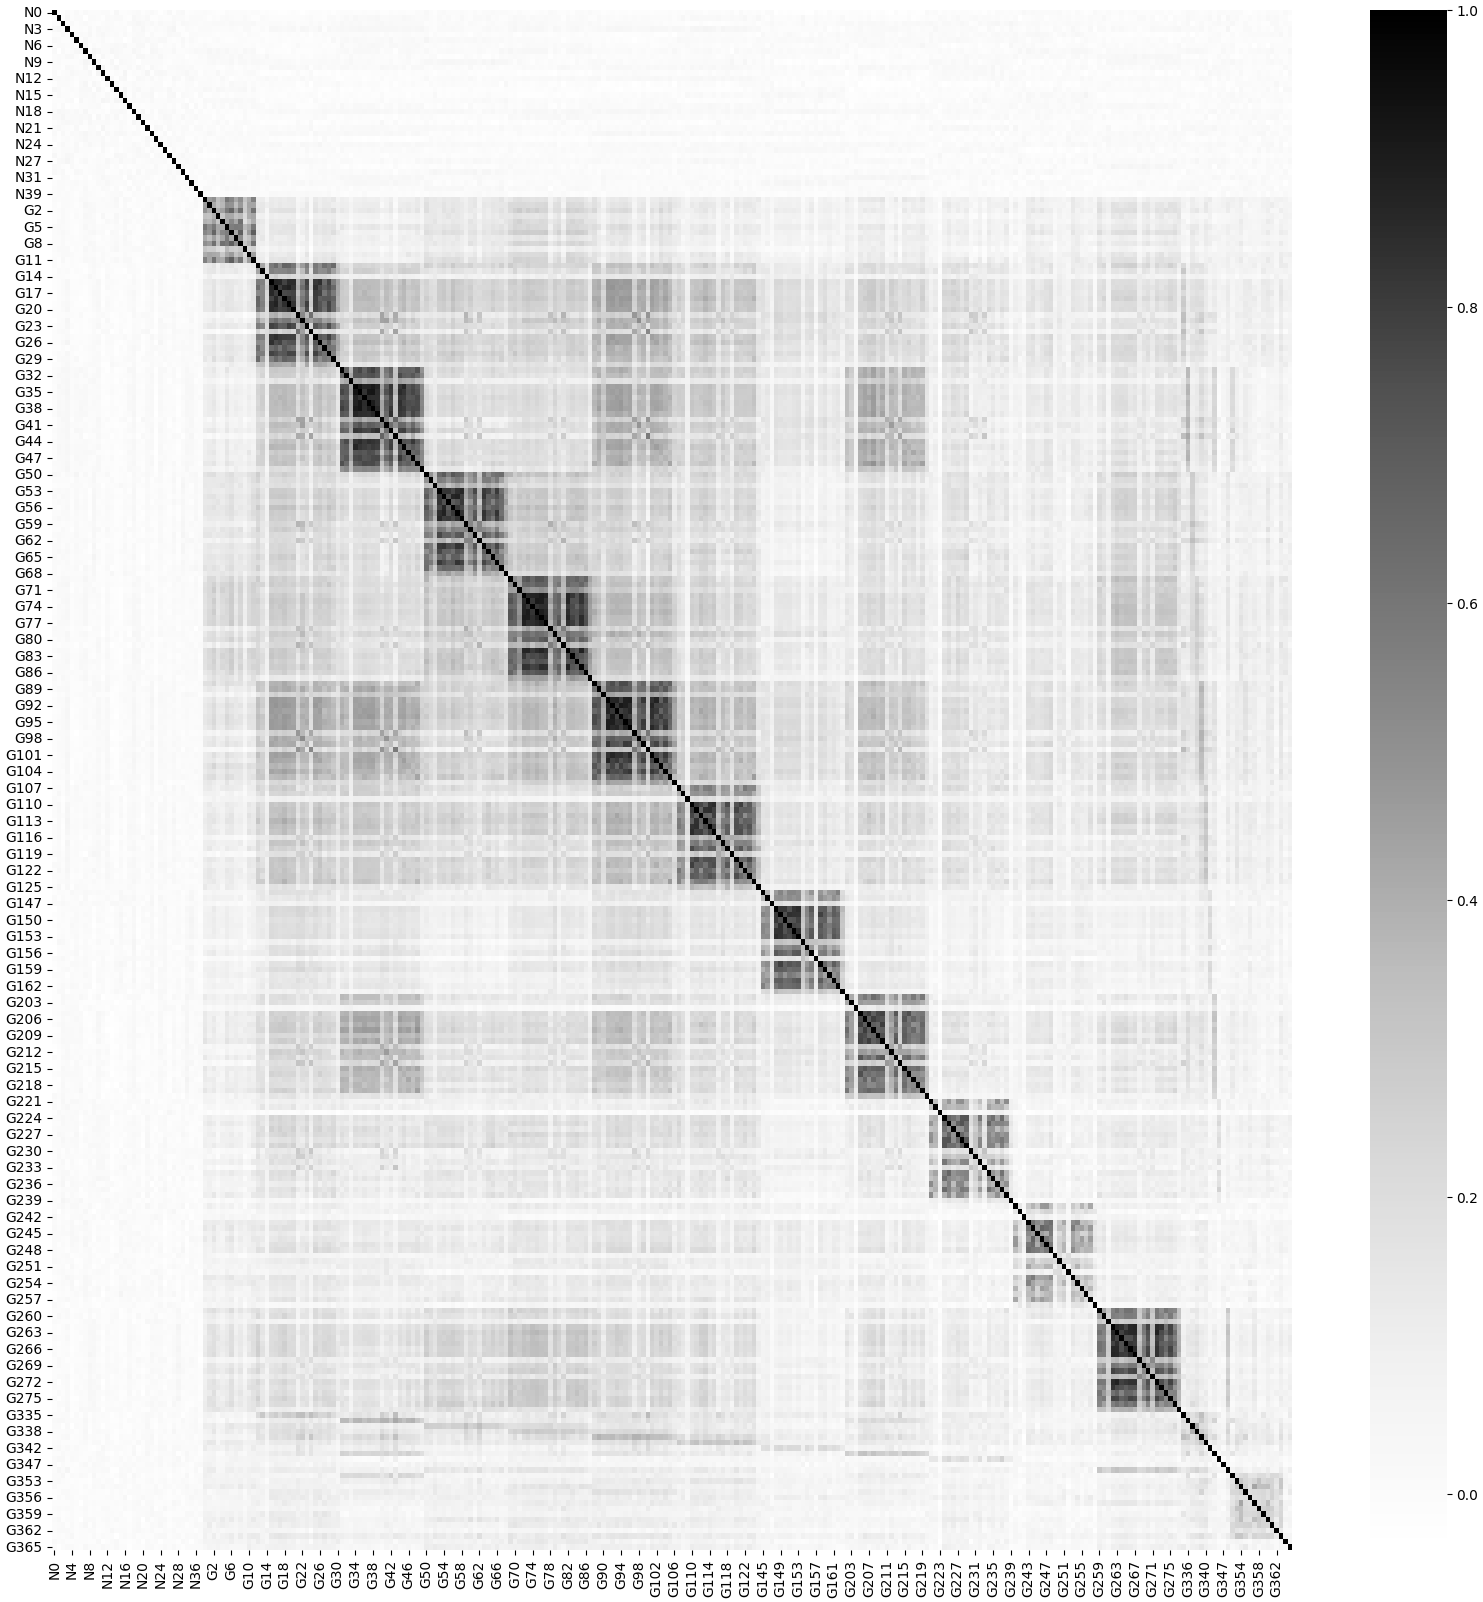

In [111]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(knn_corr_with_names, ax = ax, cmap = "Greys")

### Kernel

In [112]:
kernel_corr = []

for g1 in all_dict["all_affs"]:
    corr_with_g1 = []
    g1 = g1.flatten()
    for g2 in all_dict["all_affs"]:
        g2 = g2.flatten()
        pearson = np.corrcoef(g1,g2)[0,1]
        corr_with_g1.append(pearson)
    kernel_corr.append(corr_with_g1)

kernel_corr = np.array(kernel_corr)
kernel_corr_with_names = pd.DataFrame(kernel_corr, index= all_dict["all_names"], columns= all_dict["all_names"])
kernel_corr = pd.DataFrame(kernel_corr)

<Axes: >

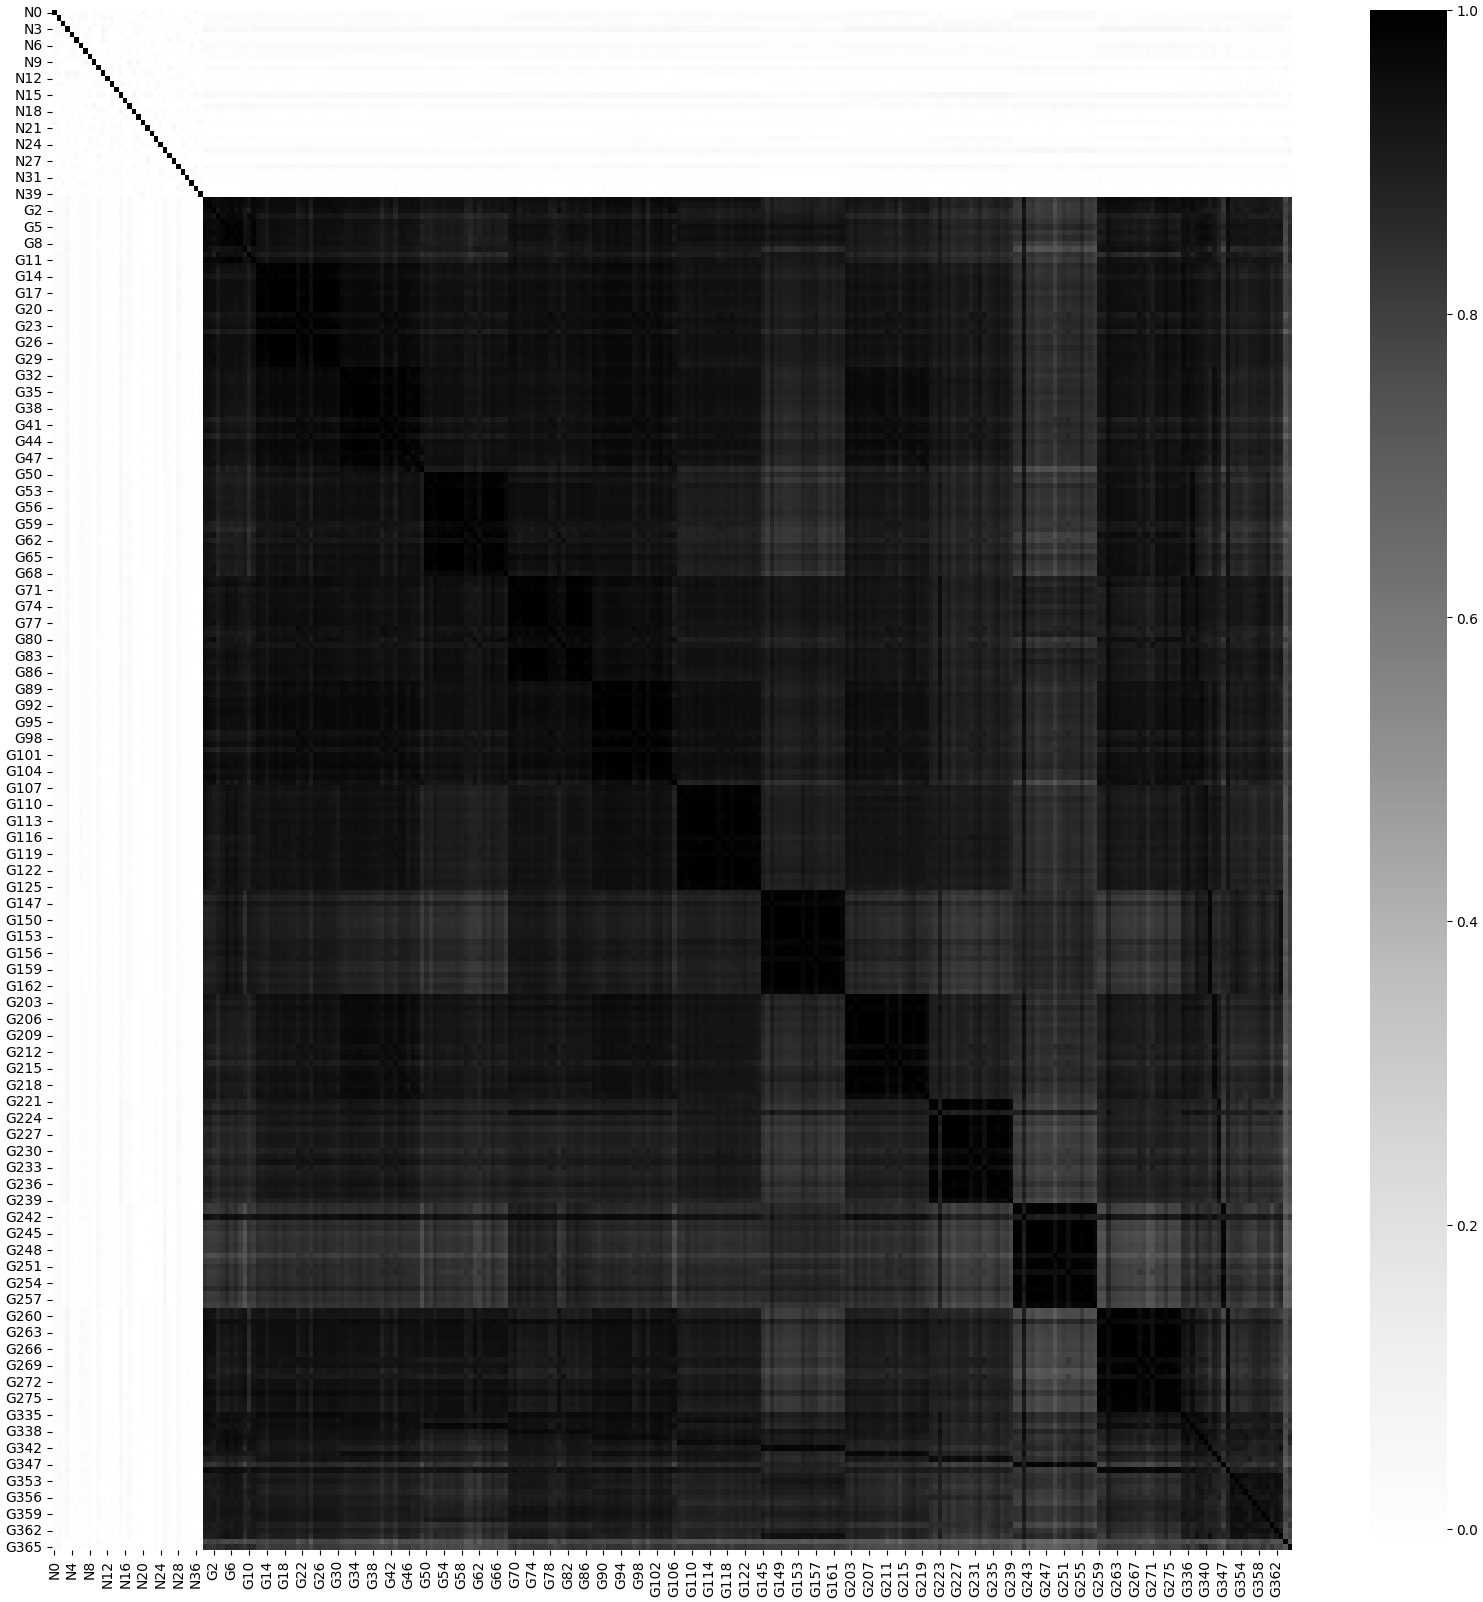

In [113]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(kernel_corr_with_names, ax = ax, cmap = "Greys")

In [135]:
df_column

modality module
0      cytof  Noise
1        adt  Noise
2    citeRNA  Noise
3    citeRNA  Noise
4    citeRNA  Noise
..       ...    ...
275    cytof   None
276    cytof   None
277    cytof   None
278  luminex   None
279     facs   None

[280 rows x 2 columns]

In [131]:
number_to_modality_new = {}
number_to_module_new = {}
all_anndata = noise_74.copy() | level1_graphs.copy()

for i, id in enumerate(all_anndata.keys()):

    number_to_modality_new[i] = all_anndata[id].uns["modality"]
    number_to_module_new[i] = all_anndata[id].uns["module"]


df_row = pd.DataFrame(number_to_modality_new.values(), columns=["modality"]).join(pd.DataFrame(number_to_module_new.values(), columns=["module"]) )
df_column = pd.DataFrame(number_to_modality_new.values(), columns=["modality"]).join(pd.DataFrame(number_to_module_new.values(), columns=["module"]) )


row_colors_dict = {"module":{"None": "grey", "IFN": "blue", "C19": "red", "cycling": "orange", "ZNF": "green", "AP1": "purple", "Noise": "cyan" },
                  "modality":{"citeRNA":"skyblue", "bulkRNA": "darkorange" , "cytof": "wheat", "adt": "darkgray", "luminex": "orangered", "facs": "yellowgreen" }  }

row_ha = HeatmapAnnotation(Modality=anno_simple(df_row.modality,colors=row_colors_dict['modality'],rasterized=True),
                           Module=anno_simple(df_row.module,colors=row_colors_dict['module'],rasterized=True),
                           axis=0)

col_ha= HeatmapAnnotation(Modality=anno_simple(df_column.modality,colors=row_colors_dict['modality'],rasterized=True),
                          Module=anno_simple(df_column.module,colors=row_colors_dict['module'],rasterized=True),
                          axis=1)

TypeError: The length of `colors` is not consistent with the shape of the input data

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Cluster

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


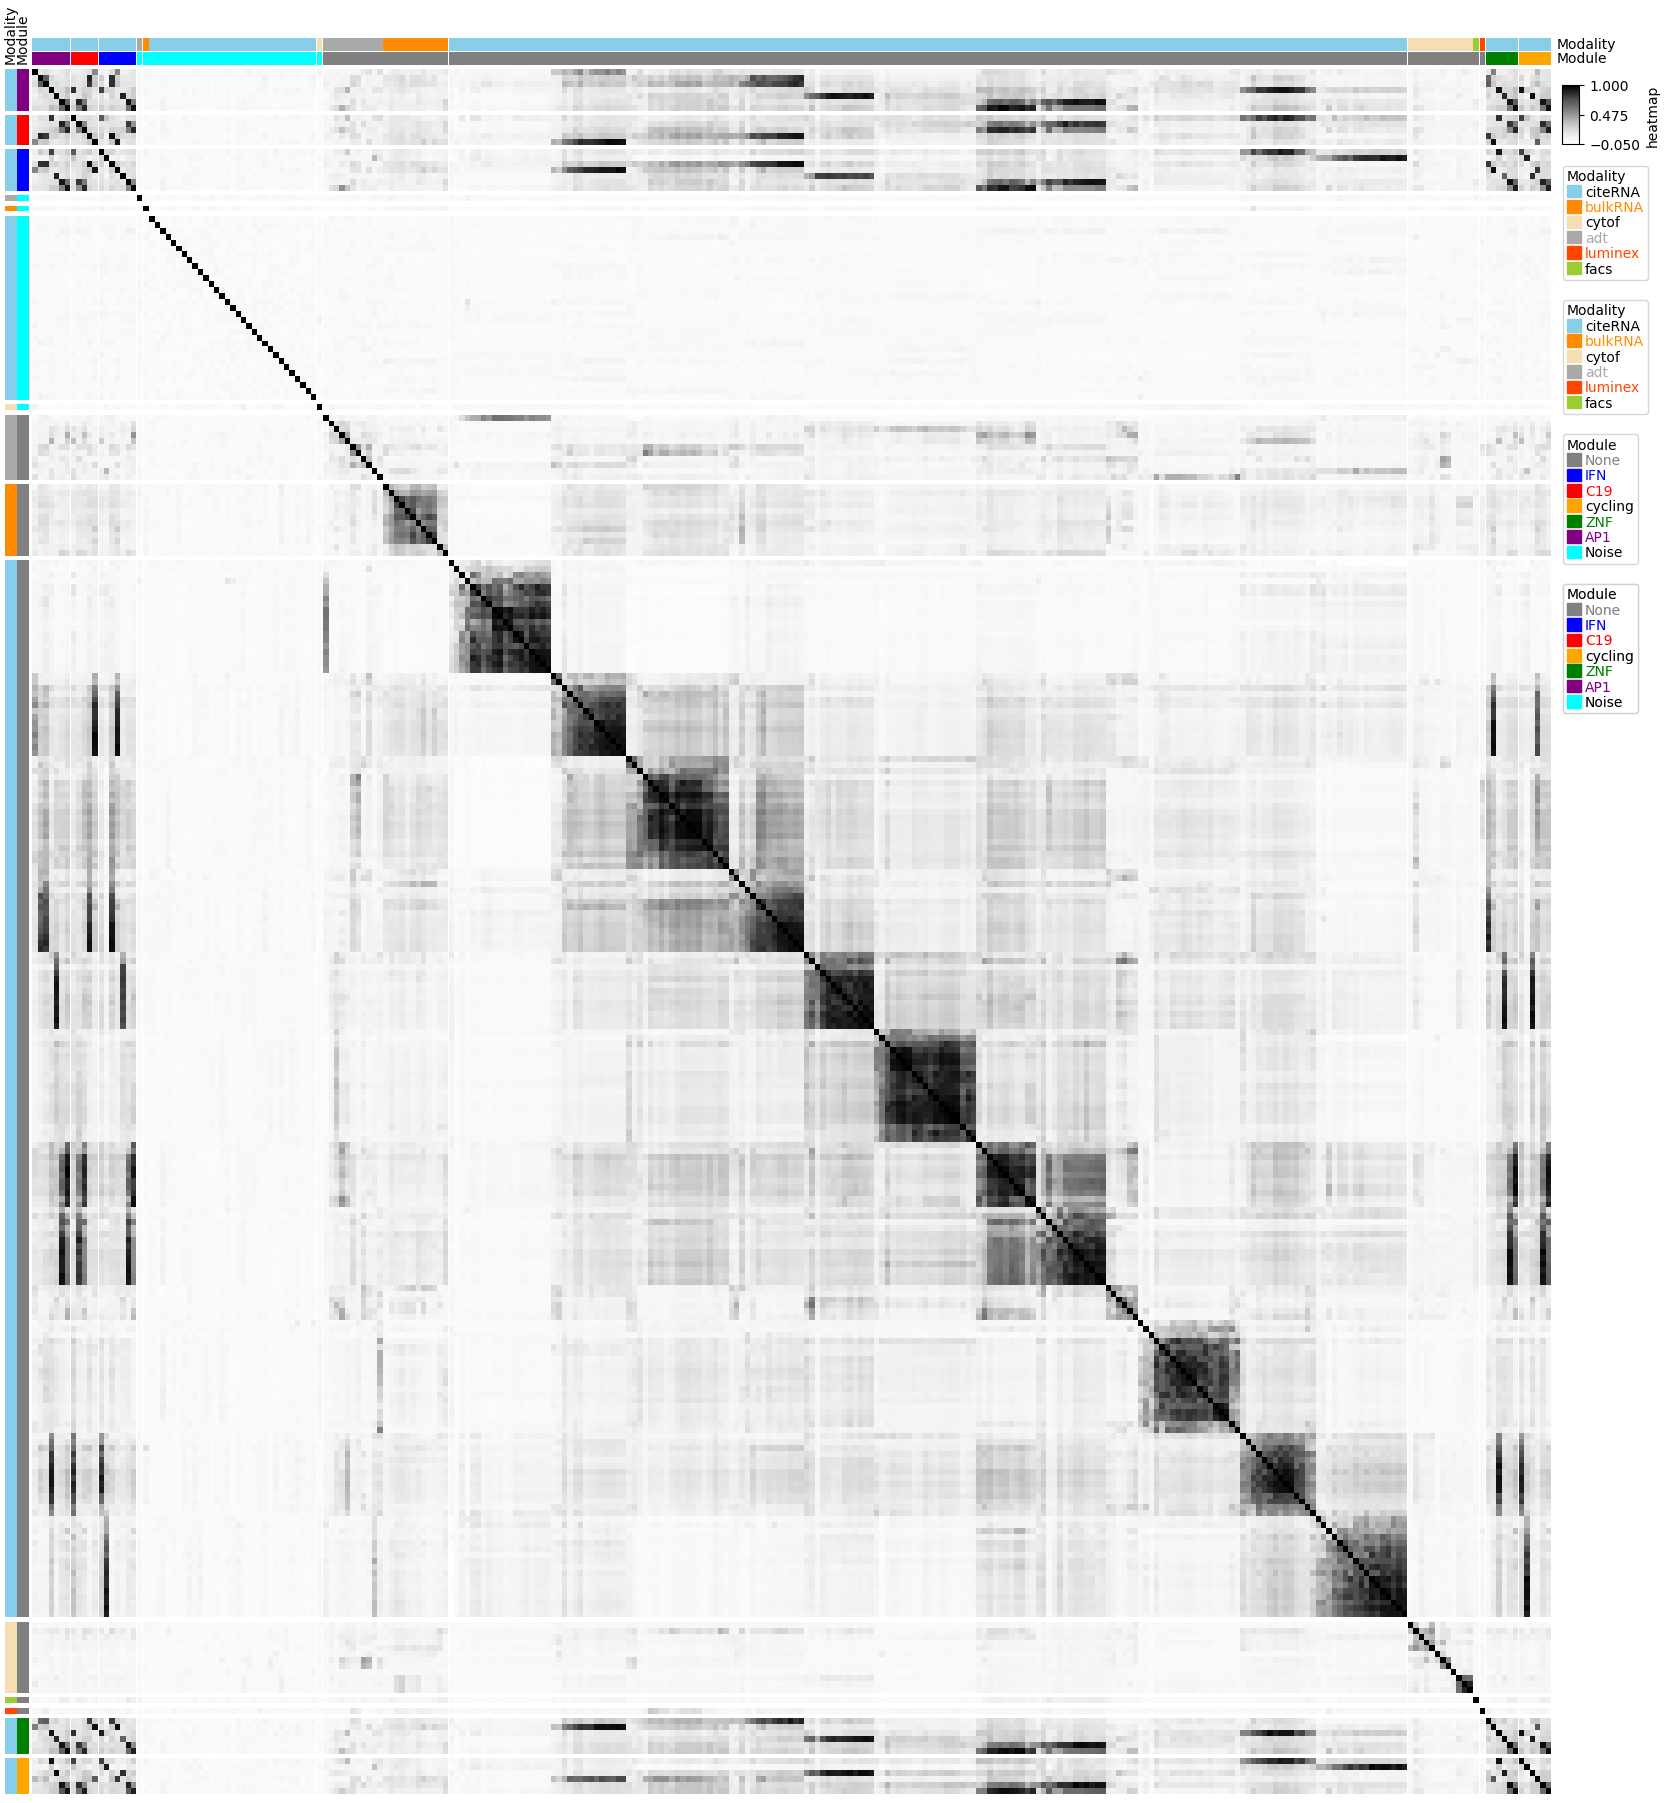

In [ ]:

fig, ax = plt.subplots(figsize=(20,20))
forb_norm_with_noise_plt = ClusterMapPlotter(data=pd.DataFrame(kernel_corr_with_names.to_numpy(), index = list(number_to_module_new.keys()), columns =  list(number_to_module_new.keys())), top_annotation=col_ha, left_annotation=row_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     row_split=df_row.loc[:, ['module', 'modality']],
                     col_split=df_column.loc[:, ['module', 'modality']],
                     cmap='Greys',
                     rasterized=True,row_split_gap=1,legend=True,legend_anchor='ax_heatmap',legend_vpad=5)

In [ ]:
#number_to_modality = {}
number_to_module = {}
#number_to_contribution = {}
number_to_cell_type = {}
number_to_process = {}


df = kernel_corr_with_names[list(citeRNA_kernel_74.keys())].transpose()[list(citeRNA_kernel_74.keys())]

for i, id in enumerate(citeRNA_kernel_74.keys()):

    #number_to_modality[i] = all_anndata[id].uns["modality"]
    number_to_module[id] = graphs_74[id].uns["module"]
    #number_to_contribution[i] = contribution[i]
    number_to_process[id] = graphs_74[id].uns["process"]
    number_to_cell_type[id] = graphs_74[id].uns["cell-type"]


df_column = pd.DataFrame(number_to_module.values(), columns=["module"], index=list(citeRNA_kernel_74.keys())).join(pd.DataFrame(number_to_process.values(), columns=["process"], index=list(citeRNA_kernel_74.keys()))).join(pd.DataFrame(number_to_cell_type.values(), columns=["cell_type"], index=list(citeRNA_kernel_74.keys())))



col_colors_dict = {"process":{"None": "white", "IFN": "blue", "C19": "red", "cycling": "orange", "ZNF": "green", "AP1": "purple", "noise": "cyan" },
                  #"module":{m: m for m in set(modules) if not m == "None" and not m == "grey60"} | { "None": "white", "grey60":"lightgrey"},
                  "cell_type":{"B":"darkblue", "Basophil": "darkred" , "CD4": "darkorange", "CD8": "brown", "DC": "darkgreen", "DN": "navy", "DP":"black", 'GDT':"lime", 'HSC': "olive", 'MAIT': "fuchsia", 'NK': "maroon", 'PB':"coral", 'bulk':"aqua", 'cMono':"teal", 'ncMono':"plum" } }


col_ha= HeatmapAnnotation(
                          Process=anno_simple(df_column.process,colors=col_colors_dict['process'],rasterized=True),
                          #Module=anno_simple(df_column.module,colors=col_colors_dict['module'],rasterized=True),
                          CellType=anno_simple(df_column.cell_type,colors=col_colors_dict['cell_type'],rasterized=True),
                          axis=1)

row_ha= HeatmapAnnotation(Process=anno_simple(df_column.process,colors=col_colors_dict['process'],rasterized=True),
                          #Module=anno_simple(df_column.module,colors=col_colors_dict['module'],rasterized=True),
                          CellType=anno_simple(df_column.cell_type,colors=col_colors_dict['cell_type'],rasterized=True),
                          axis=0)

TypeError: The length of `colors` is not consistent with the shape of the input data

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:803: UserWarning: Cluster

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


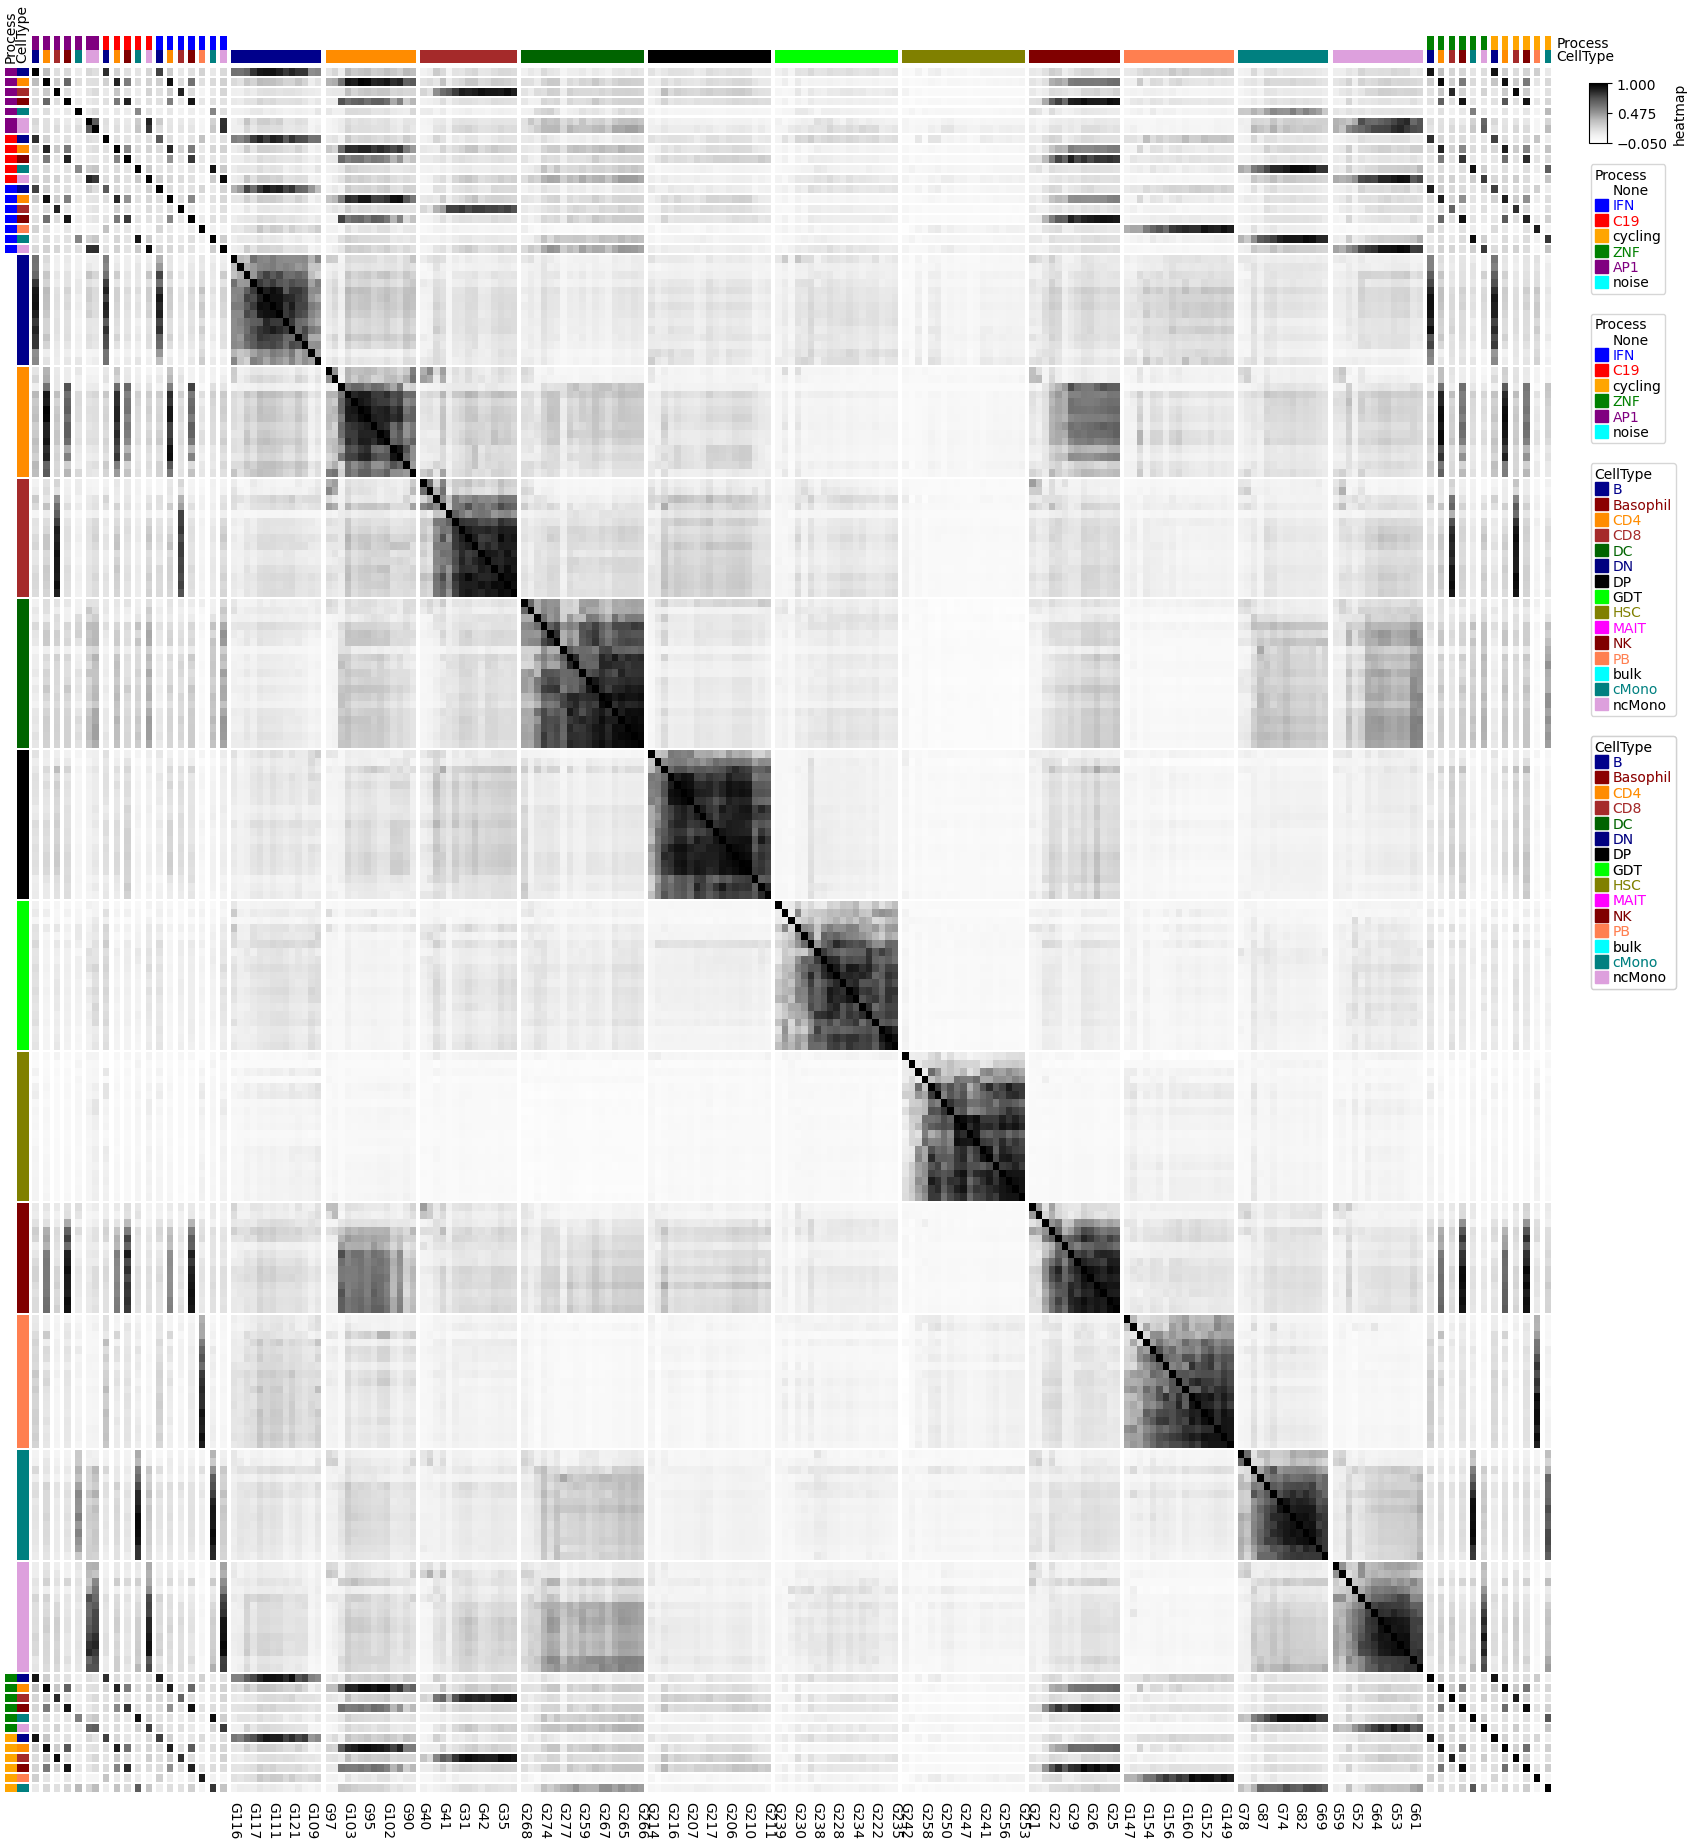

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ami_kernel_plt = ClusterMapPlotter(data=df, top_annotation=col_ha, left_annotation = row_ha,
                     show_rownames=False,show_colnames=True,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:, ["process", "cell_type",  ]],
                     row_split=df_column.loc[:, ["process", "cell_type",  ]],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.2,legend=True,legend_anchor='ax_heatmap',legend_vpad=5,legend_hpad= 8 )

# Negative Control

## Score Decline

In [117]:
snf_none_noise = compute.snf(list(kernel_PSNs_level1.values()), K=8, t = 40)
tm_none_noise = make_transition_matrix(snf_none_noise)
rw_non_noise = random_walker_objective(tm_none_noise)[2]

snf_noise = compute.snf(all_dict["all_affs"], K=8, t = 40)
tm_noise = make_transition_matrix(snf_noise)
rw_noise = random_walker_objective(tm_noise)[2]

print(rw_non_noise > rw_noise )

True


In [118]:
first, second = compute.get_n_clusters(snf_none_noise)
labels_none_noise = sc_labels_kernel = cluster.spectral_clustering(snf_none_noise, n_clusters=first, n_init = 40)
sil_none_noise = skl.metrics.silhouette_score(snf_none_noise, labels_none_noise)

first, second = compute.get_n_clusters(snf_noise)
labels_noise = sc_labels_kernel = cluster.spectral_clustering(snf_noise, n_clusters=first, n_init = 40)
sil_noise = skl.metrics.silhouette_score(snf_noise, labels_noise)

print(sil_none_noise > sil_noise )

False


In [120]:
ami_none_noise = ami(list(ground_truth_d.values()), labels_none_noise)
ami_noise = ami(list(ground_truth_d.values()), labels_noise)

print(ami_none_noise > ami_noise )

True


In [121]:
db_none_noise = skl.metrics.davies_bouldin_score(snf_none_noise, labels_none_noise)
db_noise = skl.metrics.davies_bouldin_score(snf_noise, labels_noise)

print(db_none_noise < db_noise ) #The smaller the  better

True


## AMI with SNF vs. AMI with Ground-Truth

<Axes: >

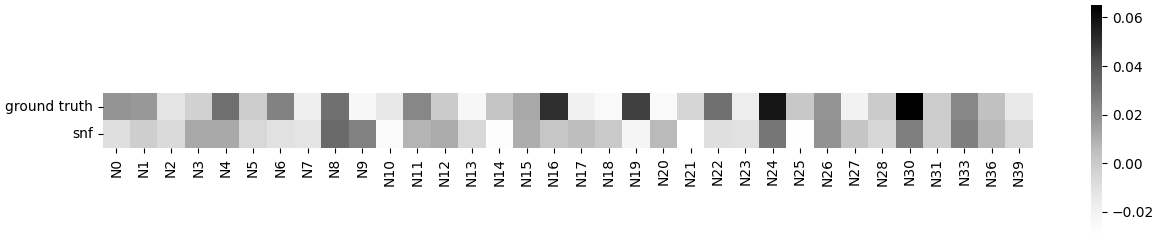

In [ ]:
noise_labels = {"ground_truth": ground_truth, "snf": fused_snf_labels }
for name in list(noise_74.keys()):
    noise_labels[name] = labels_kernel_sc[name]


ami_noise = []
for k1 in list(noise_labels.keys())[:2]:
    g1 = noise_labels[k1]
    ami_with_g1 = []
    for k2 in list(noise_labels.keys())[2:]:
        g2 = noise_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_noise.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pd.DataFrame(ami_noise, index = ["ground truth", "snf"], columns = list(noise_74.keys())), ax = ax, cmap = "Greys", square=True, cbar_kws={"shrink": 0.2})

<Axes: >

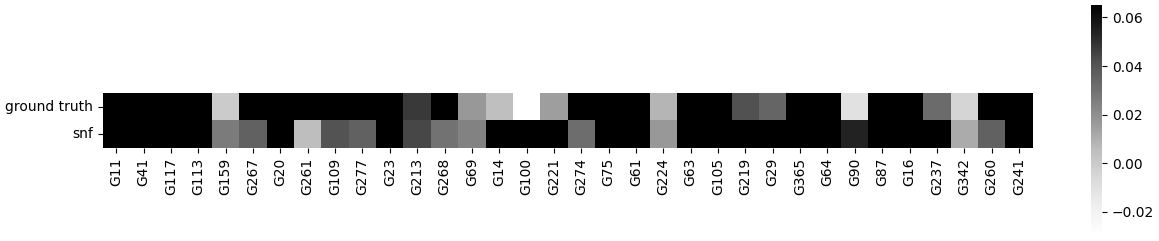

In [ ]:
non_noise_labels = {"ground_truth": ground_truth, "snf": fused_snf_labels }
non_noise_random = np.random.choice(list(graphs_74.keys()), len(noise_74.keys()), replace=False)
for name in non_noise_random:
    non_noise_labels[name] = labels_kernel_sc[name]

ami_non_noise = []
for k1 in list(non_noise_labels.keys())[:2]:
    g1 = non_noise_labels[k1]
    ami_with_g1 = []
    for k2 in list(non_noise_labels.keys())[2:]:
        g2 = non_noise_labels[k2]
        ami_score = ami(g1,g2)
        ami_with_g1.append(ami_score)
    
    ami_non_noise.append(ami_with_g1)

fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pd.DataFrame(ami_non_noise, index = ["ground truth", "snf"], columns = non_noise_random), ax = ax, cmap = "Greys", square=True, cbar_kws={"shrink": 0.2}, vmin=pd.DataFrame(ami_noise).min().min(), vmax=pd.DataFrame(ami_noise).max().max())

# Positive Control

## Kernel-PSN contribution to Ground Truth measured via AMI, Similirty measured via AMI, Labels extracted via Spectral Clustering

In [127]:
g1 = list(ground_truth_d.values())
kernel_labels = {"ground_truth": list(ground_truth_d.values()) , "snf": labels_level1["labels_fused_kernel"]} 
for name in list(level1_graphs.keys()):
    kernel_labels[name] = labels_level1["unimodal_kernel_labels"][name]
    
contributions = []
for g2 in list(kernel_labels.values())[2:]: 
        ami_score = ami(g1,g2)
        contributions.append(ami_score)

contributions = np.array(contributions)


similarities = []
for g1 in list(kernel_labels.values())[2:]: 
    ami_with_g1 = []
    for g2 in list(kernel_labels.values())[2:]: 
            ami_score = ami(g1,g2)
            ami_with_g1.append(ami_score)
    similarities.append(ami_with_g1)
similarities = pd.DataFrame(similarities, index= list(kernel_labels.keys())[2:], columns= list(kernel_labels.keys())[2:])

contribution_differences = []
for i, c1 in enumerate(contributions):
    cont_diff = []
    for j, c2 in enumerate(contributions):
       cont_diff.append(abs(c1 - c2))
    contribution_differences.append(cont_diff)
contribution_differences = pd.DataFrame(contribution_differences, columns = list(level1_graphs.keys()), index = list(level1_graphs.keys()))

tolerance = np.percentile(contribution_differences, 35)

pc1 = []
for i in similarities.index:
    pc = []
    for j in similarities.columns:
        s = similarities.loc[i,j]
        c = contribution_differences.loc[i,j]
        if s >= 0.6:
            if c <= tolerance:
                pc.append(1)
            else:
                pc.append(0)
        else:
            pc.append(0.5)
    pc1.append(pc)

<Axes: >

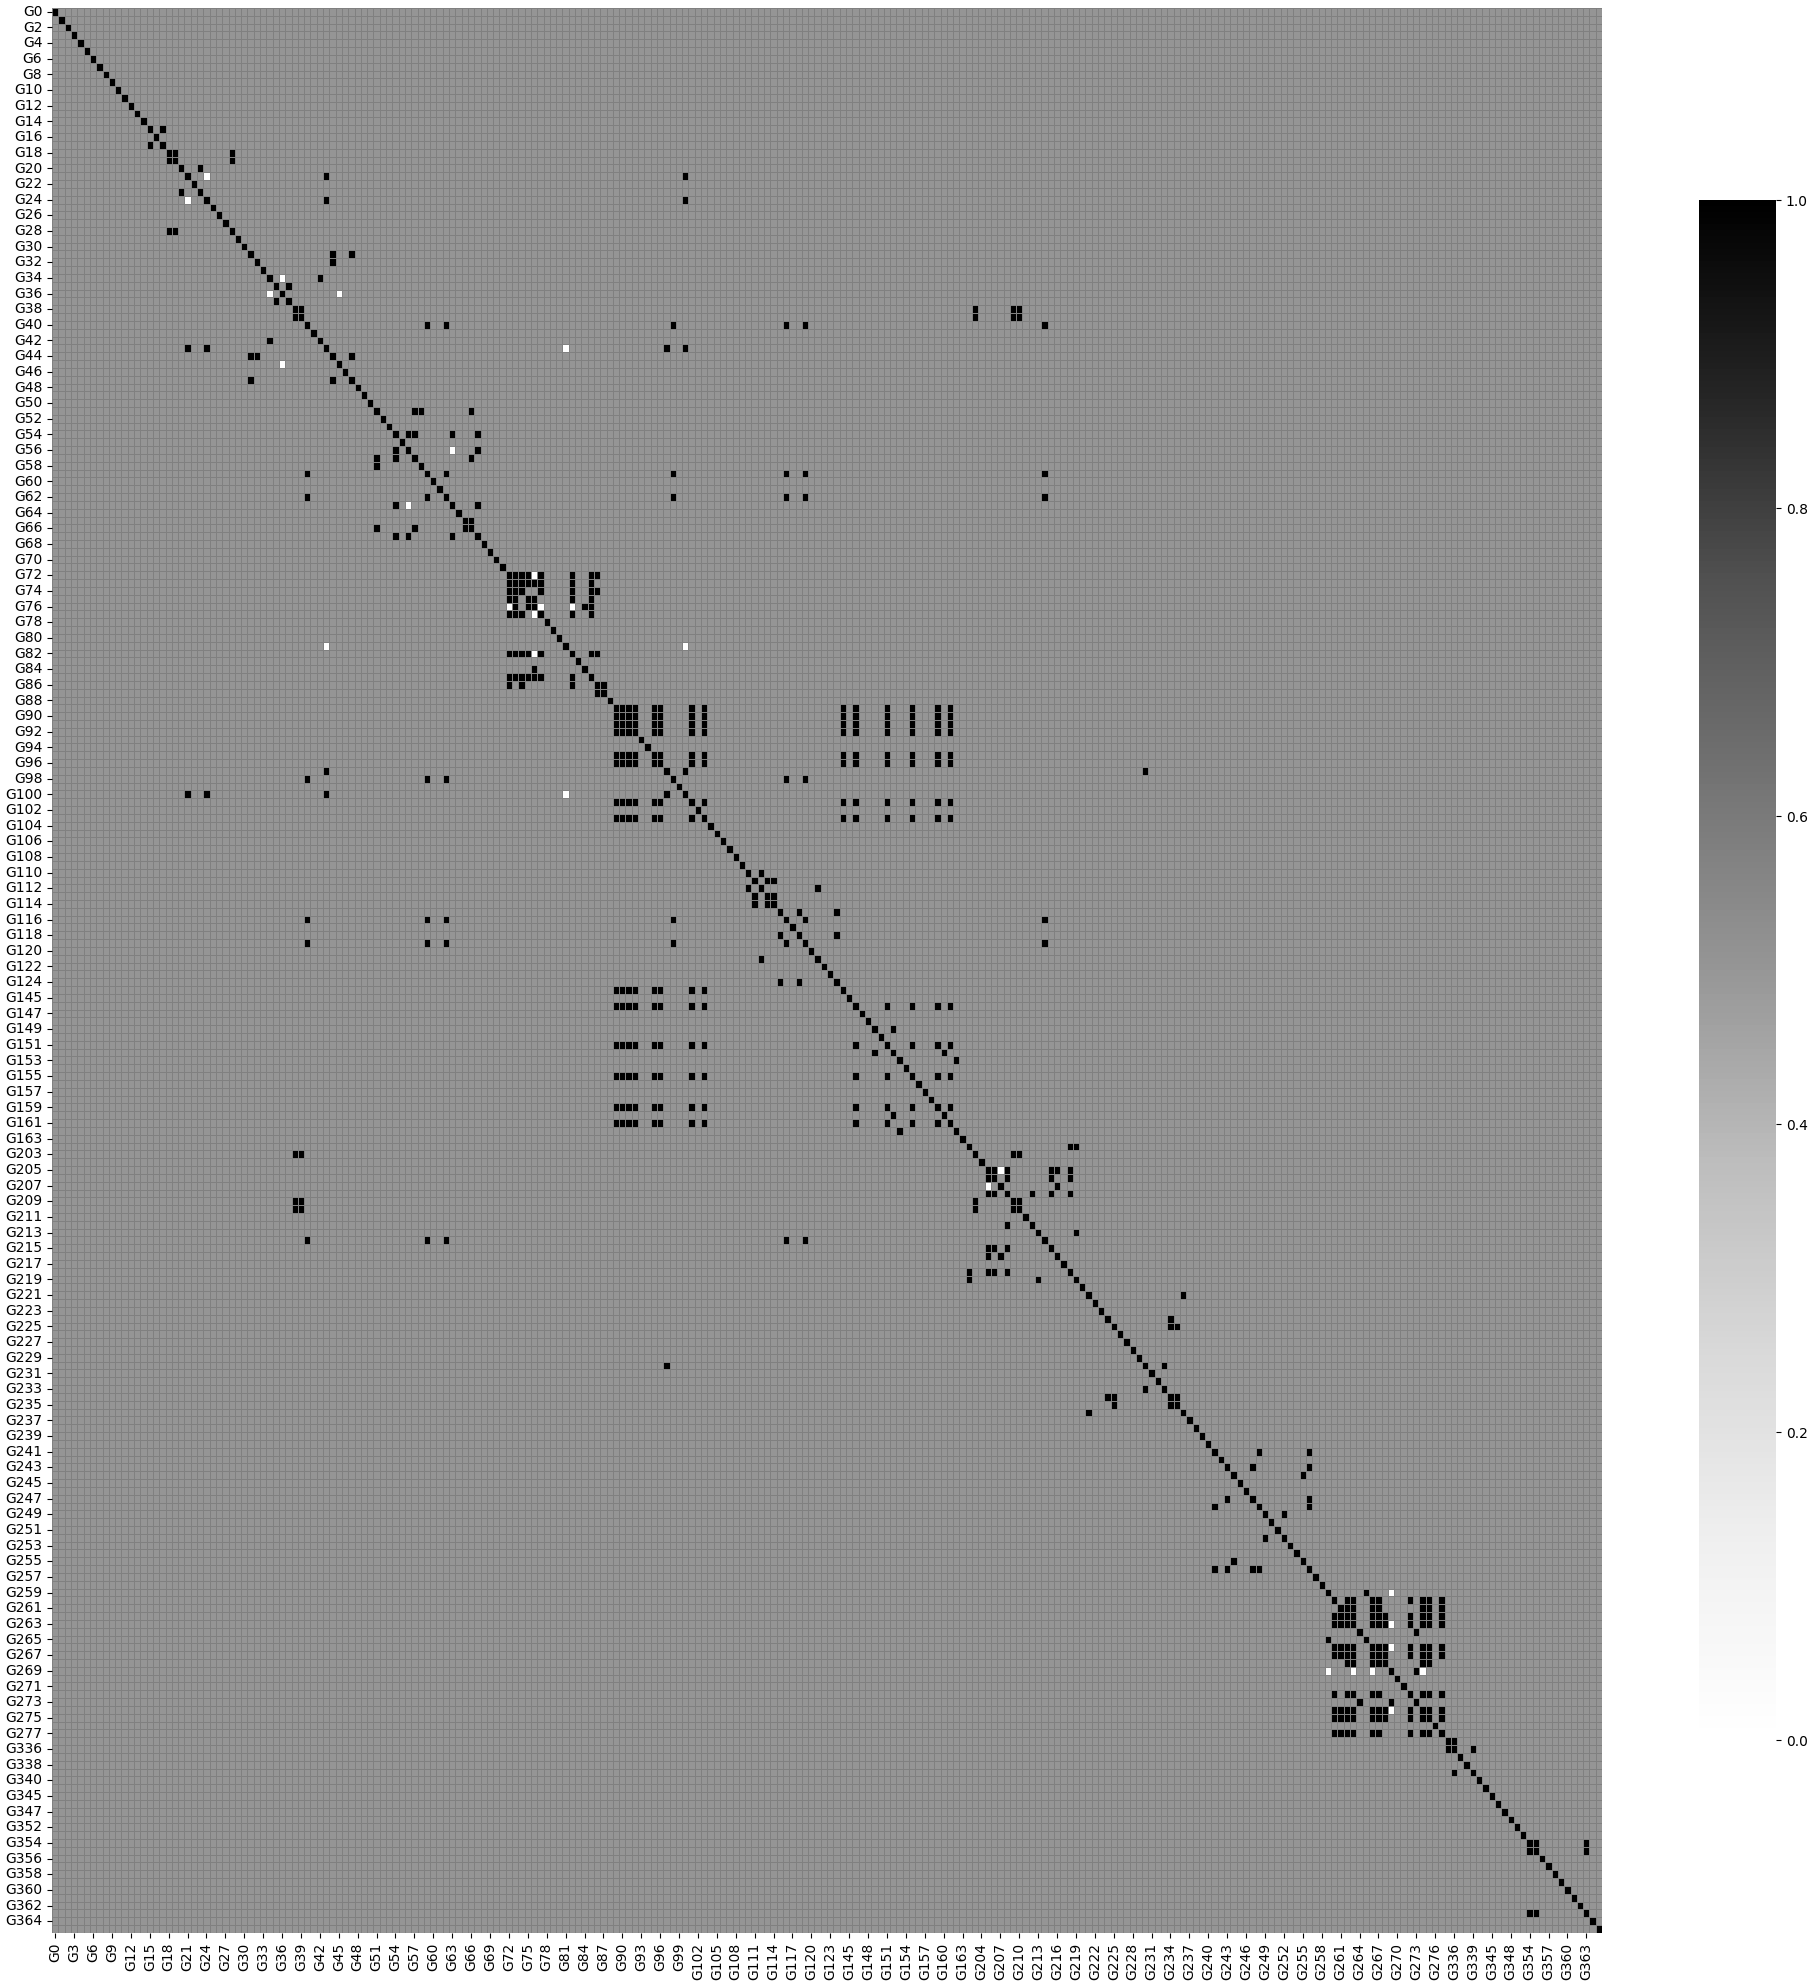

In [129]:
fig, ax = plt.subplots(figsize=(25,25))
sb.heatmap(pd.DataFrame(pc1, index = list(level1_graphs.keys()), columns = list(level1_graphs.keys())), ax = ax, cmap = "Greys", robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

## Kernel-PSN contributin to SNF-Fusion measured via AMI, Similarity measured via AMI, Labels extracted via Spectral Clustering

In [ ]:
g1 = fused_snf_labels
contributions = []
for g2 in list(kernel_labels.values())[2:]: 
        ami_score = ami(g1,g2)
        contributions.append(ami_score)

contributions = np.array(contributions)

similarities = []
for g1 in list(kernel_labels.values())[2:]: 
    ami_with_g1 = []
    for g2 in list(kernel_labels.values())[2:]: 
            ami_score = ami(g1,g2)
            ami_with_g1.append(ami_score)
    similarities.append(ami_with_g1)
similarities = pd.DataFrame(similarities, index= list(kernel_labels.keys())[2:], columns= list(kernel_labels.keys())[2:])

contribution_differences = []
for i, c1 in enumerate(contributions):
    cont_diff = []
    for j, c2 in enumerate(contributions):
       cont_diff.append(abs(c1 - c2))
    contribution_differences.append(cont_diff)
contribution_differences = pd.DataFrame(contribution_differences, columns = list(graphs_74.keys()), index = list(graphs_74.keys()))

tolerance = np.percentile(contribution_differences, 35)

pc2 = []
for i in similarities.index:
    pc = []
    for j in similarities.columns:
        s = similarities.loc[i,j]
        c = contribution_differences.loc[i,j]
        if s >= 0.6:
            if c <= tolerance:
                pc.append(1)
            else:
                pc.append(0)
        else:
            pc.append(0.5)
    pc2.append(pc)

<Axes: >

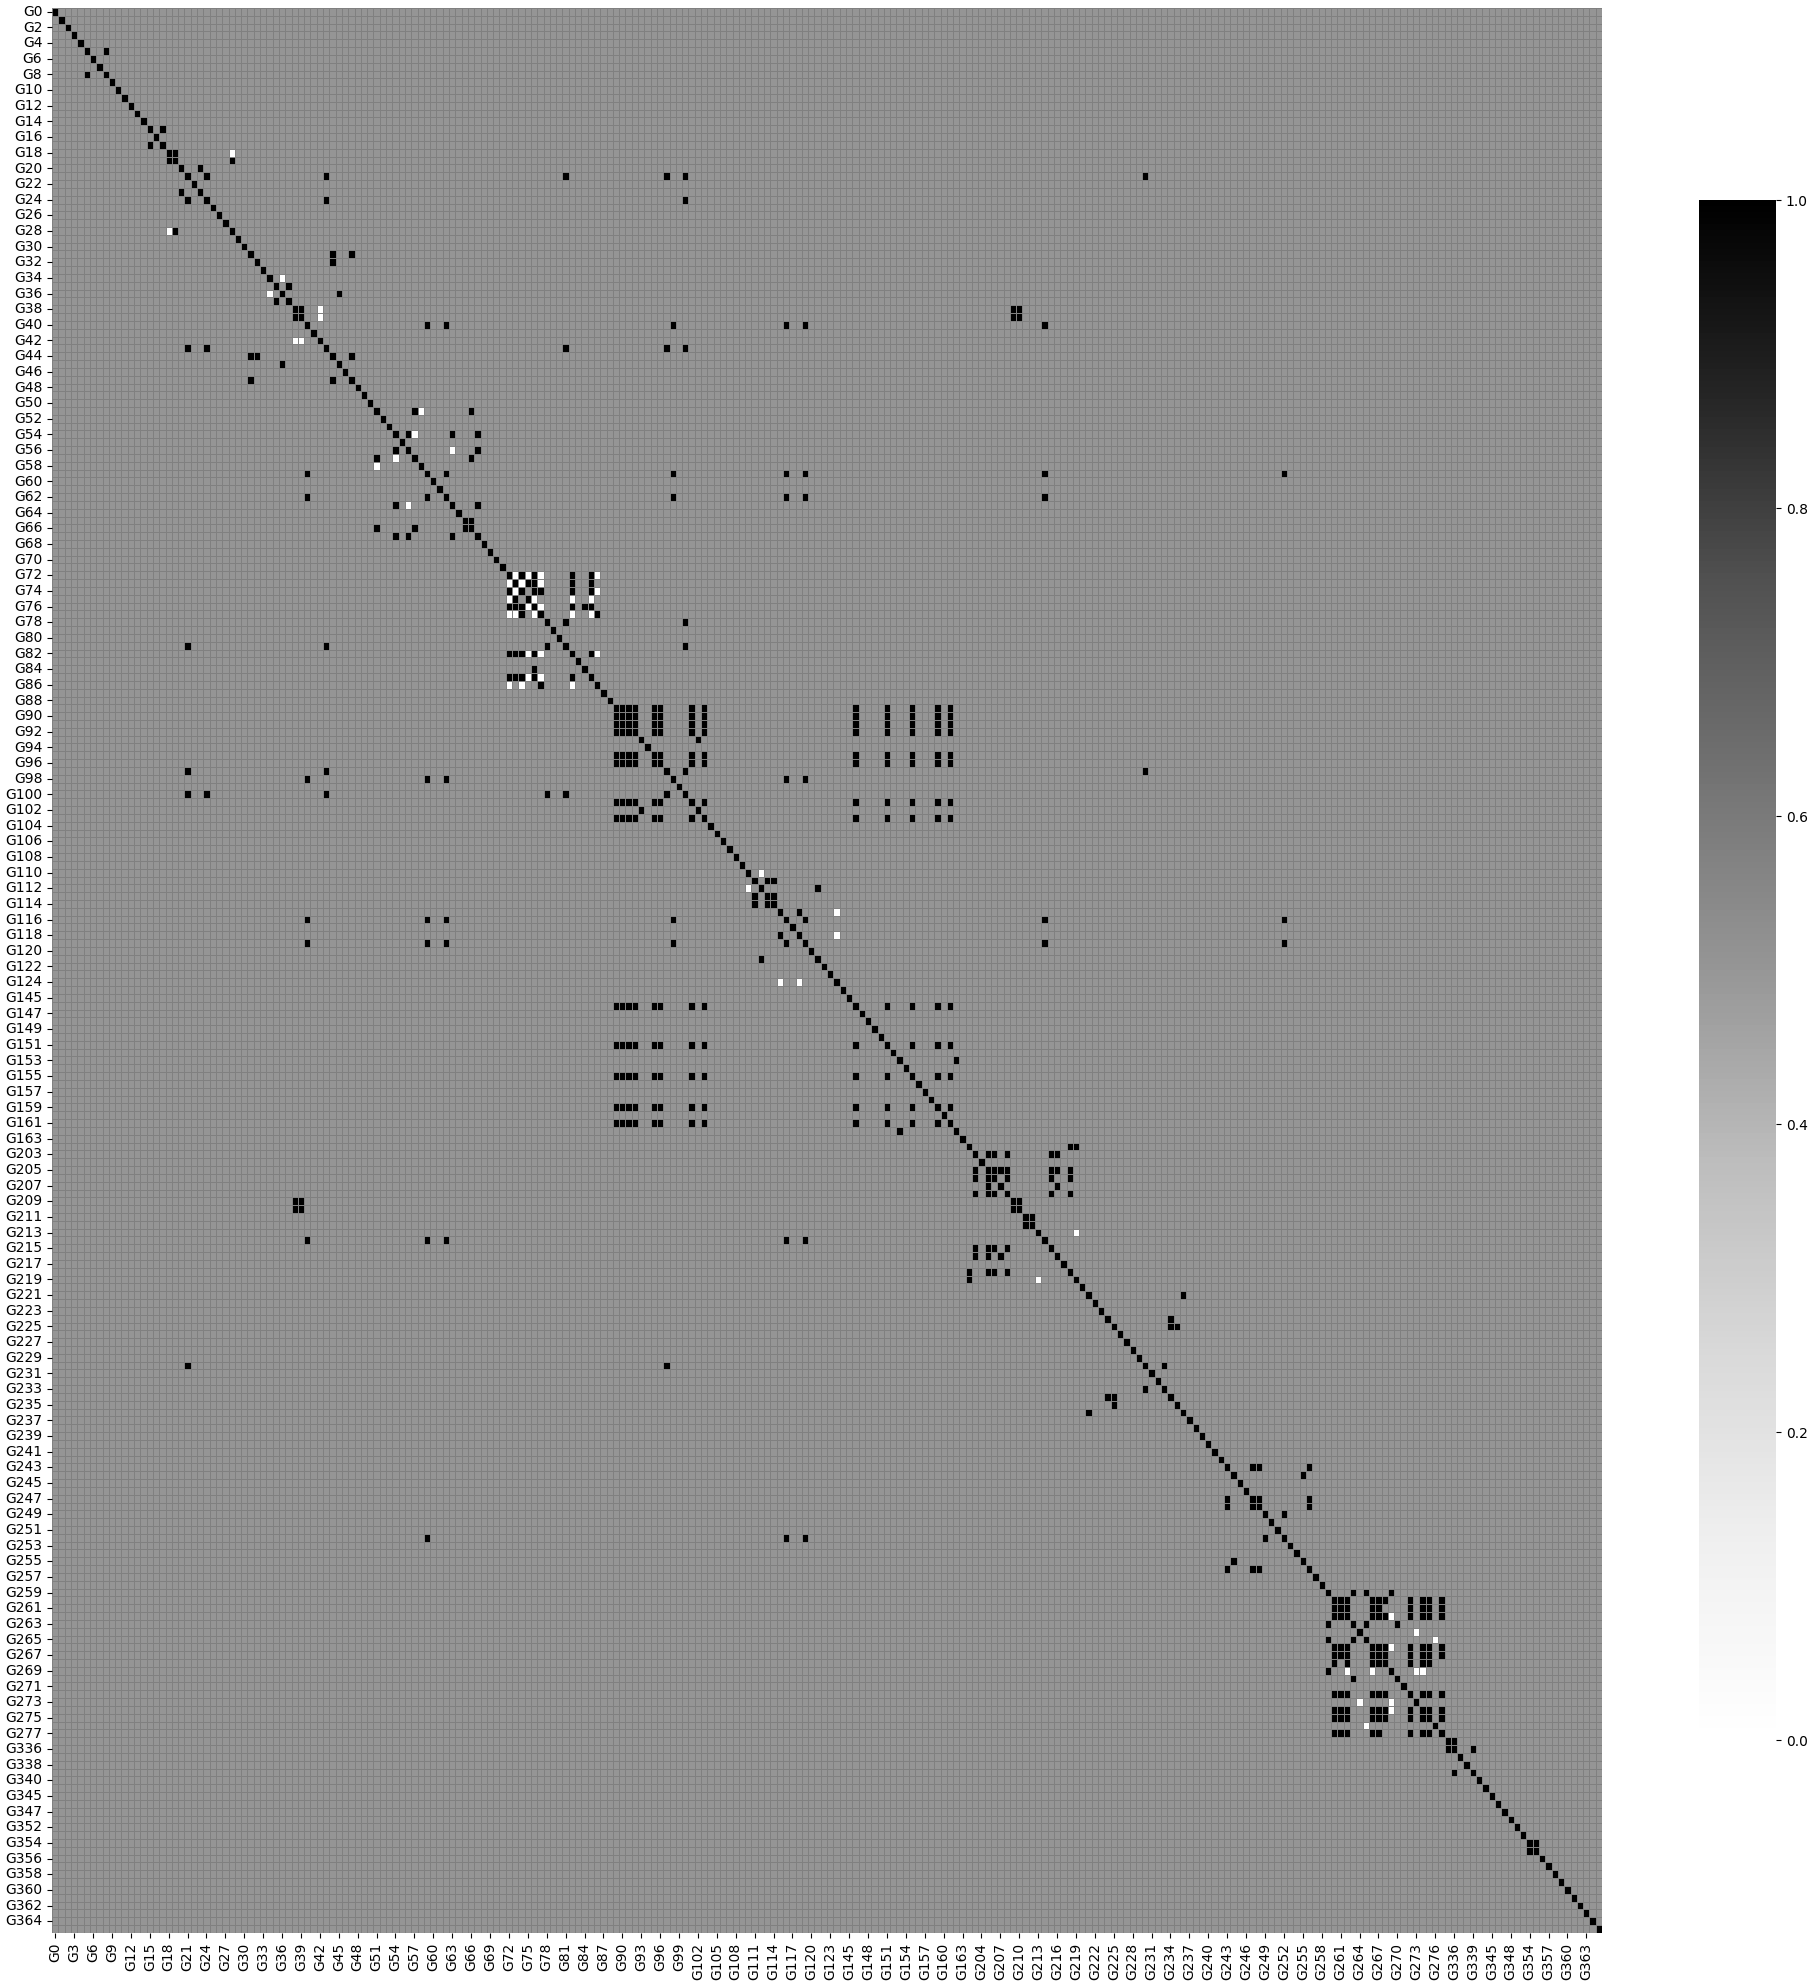

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
sb.heatmap(pd.DataFrame(pc2, index = list(graphs_74.keys()), columns = list(graphs_74.keys())), ax = ax, cmap = "Greys", robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

## KNN-PSN contribution to Ground Truth measured via AMI, Similarity measured via AMI, Labels extracted via Leiden Clustering

In [ ]:
g1 = ground_truth
contributions = []
for g2 in list(knn_labels.values())[2:]: 
        ami_score = ami(g1,g2)
        contributions.append(ami_score)

contributions = np.array(contributions)

similarities = []
for g1 in list(knn_labels.values())[2:]: 
    ami_with_g1 = []
    for g2 in list(knn_labels.values())[2:]: 
            ami_score = ami(g1,g2)
            ami_with_g1.append(ami_score)
    similarities.append(ami_with_g1)
similarities = pd.DataFrame(similarities, index= list(knn_labels.keys())[2:], columns= list(knn_labels.keys())[2:])

contribution_differences = []
for i, c1 in enumerate(contributions):
    cont_diff = []
    for j, c2 in enumerate(contributions):
       cont_diff.append(abs(c1 - c2))
    contribution_differences.append(cont_diff)
contribution_differences = pd.DataFrame(contribution_differences, columns = list(graphs_74.keys()), index = list(graphs_74.keys()))

tolerance = np.percentile(contribution_differences, 35)

pc3 = []
for i in similarities.index:
    pc = []
    for j in similarities.columns:
        s = similarities.loc[i,j]
        c = contribution_differences.loc[i,j]
        if s >= 0.6:
            if c <= tolerance:
                pc.append(1)
            else:
                pc.append(0)
        else:
            pc.append(0.5)
    pc3.append(pc)

<Axes: >

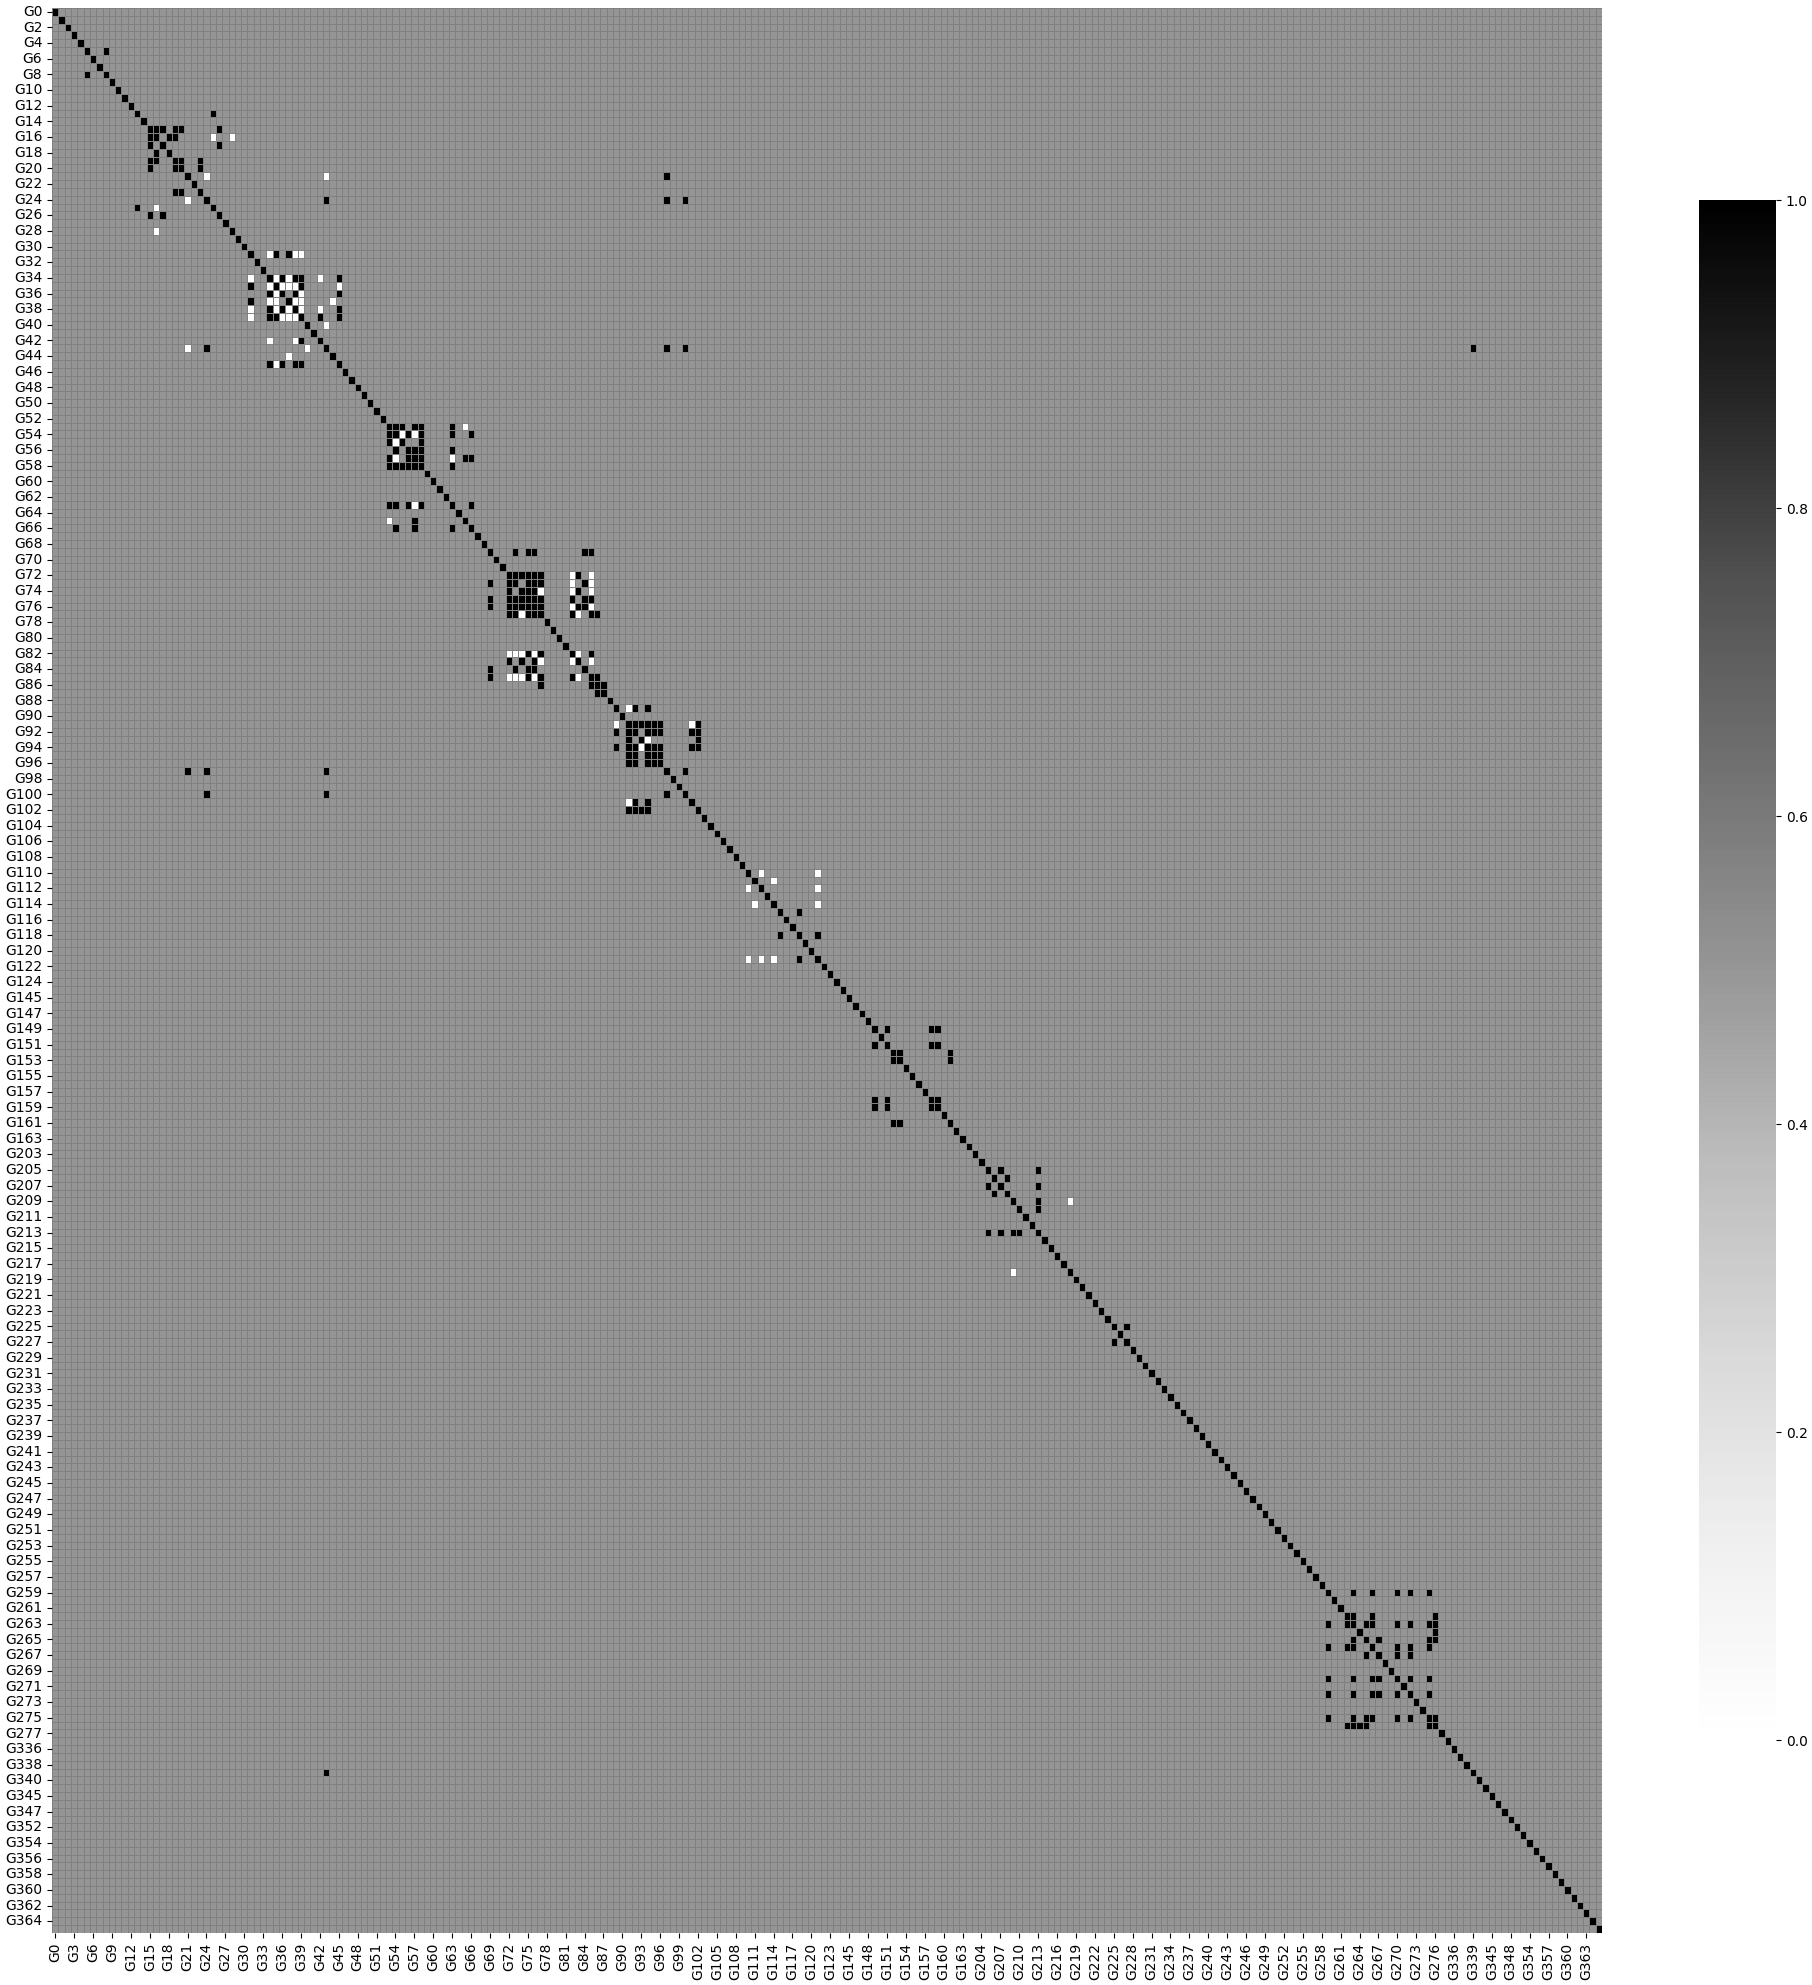

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
sb.heatmap(pd.DataFrame(pc3, index = list(graphs_74.keys()), columns = list(graphs_74.keys())), ax = ax, cmap = "Greys", robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

## KNN-PSN contribution to WA-Fusion measured via AMI, Similarity measured via AMI, Labels extracted via Leiden Clustering

In [ ]:
g1 = fused_wa_labels
contributions = []
for g2 in list(knn_labels.values())[2:]: 
        ami_score = ami(g1,g2)
        contributions.append(ami_score)

contributions = np.array(contributions)

similarities = []
for g1 in list(knn_labels.values())[2:]: 
    ami_with_g1 = []
    for g2 in list(knn_labels.values())[2:]: 
            ami_score = ami(g1,g2)
            ami_with_g1.append(ami_score)
    similarities.append(ami_with_g1)
similarities = pd.DataFrame(similarities, index= list(knn_labels.keys())[2:], columns= list(knn_labels.keys())[2:])

contribution_differences = []
for i, c1 in enumerate(contributions):
    cont_diff = []
    for j, c2 in enumerate(contributions):
       cont_diff.append(abs(c1 - c2))
    contribution_differences.append(cont_diff)
contribution_differences = pd.DataFrame(contribution_differences, columns = list(graphs_74.keys()), index = list(graphs_74.keys()))

tolerance = np.percentile(contribution_differences, 35)

pc4 = []
for i in similarities.index:
    pc = []
    for j in similarities.columns:
        s = similarities.loc[i,j]
        c = contribution_differences.loc[i,j]
        if s >= 0.6:
            if c <= tolerance:
                pc.append(1)
            else:
                pc.append(0)
        else:
            pc.append(0.5)
    pc4.append(pc)

<Axes: >

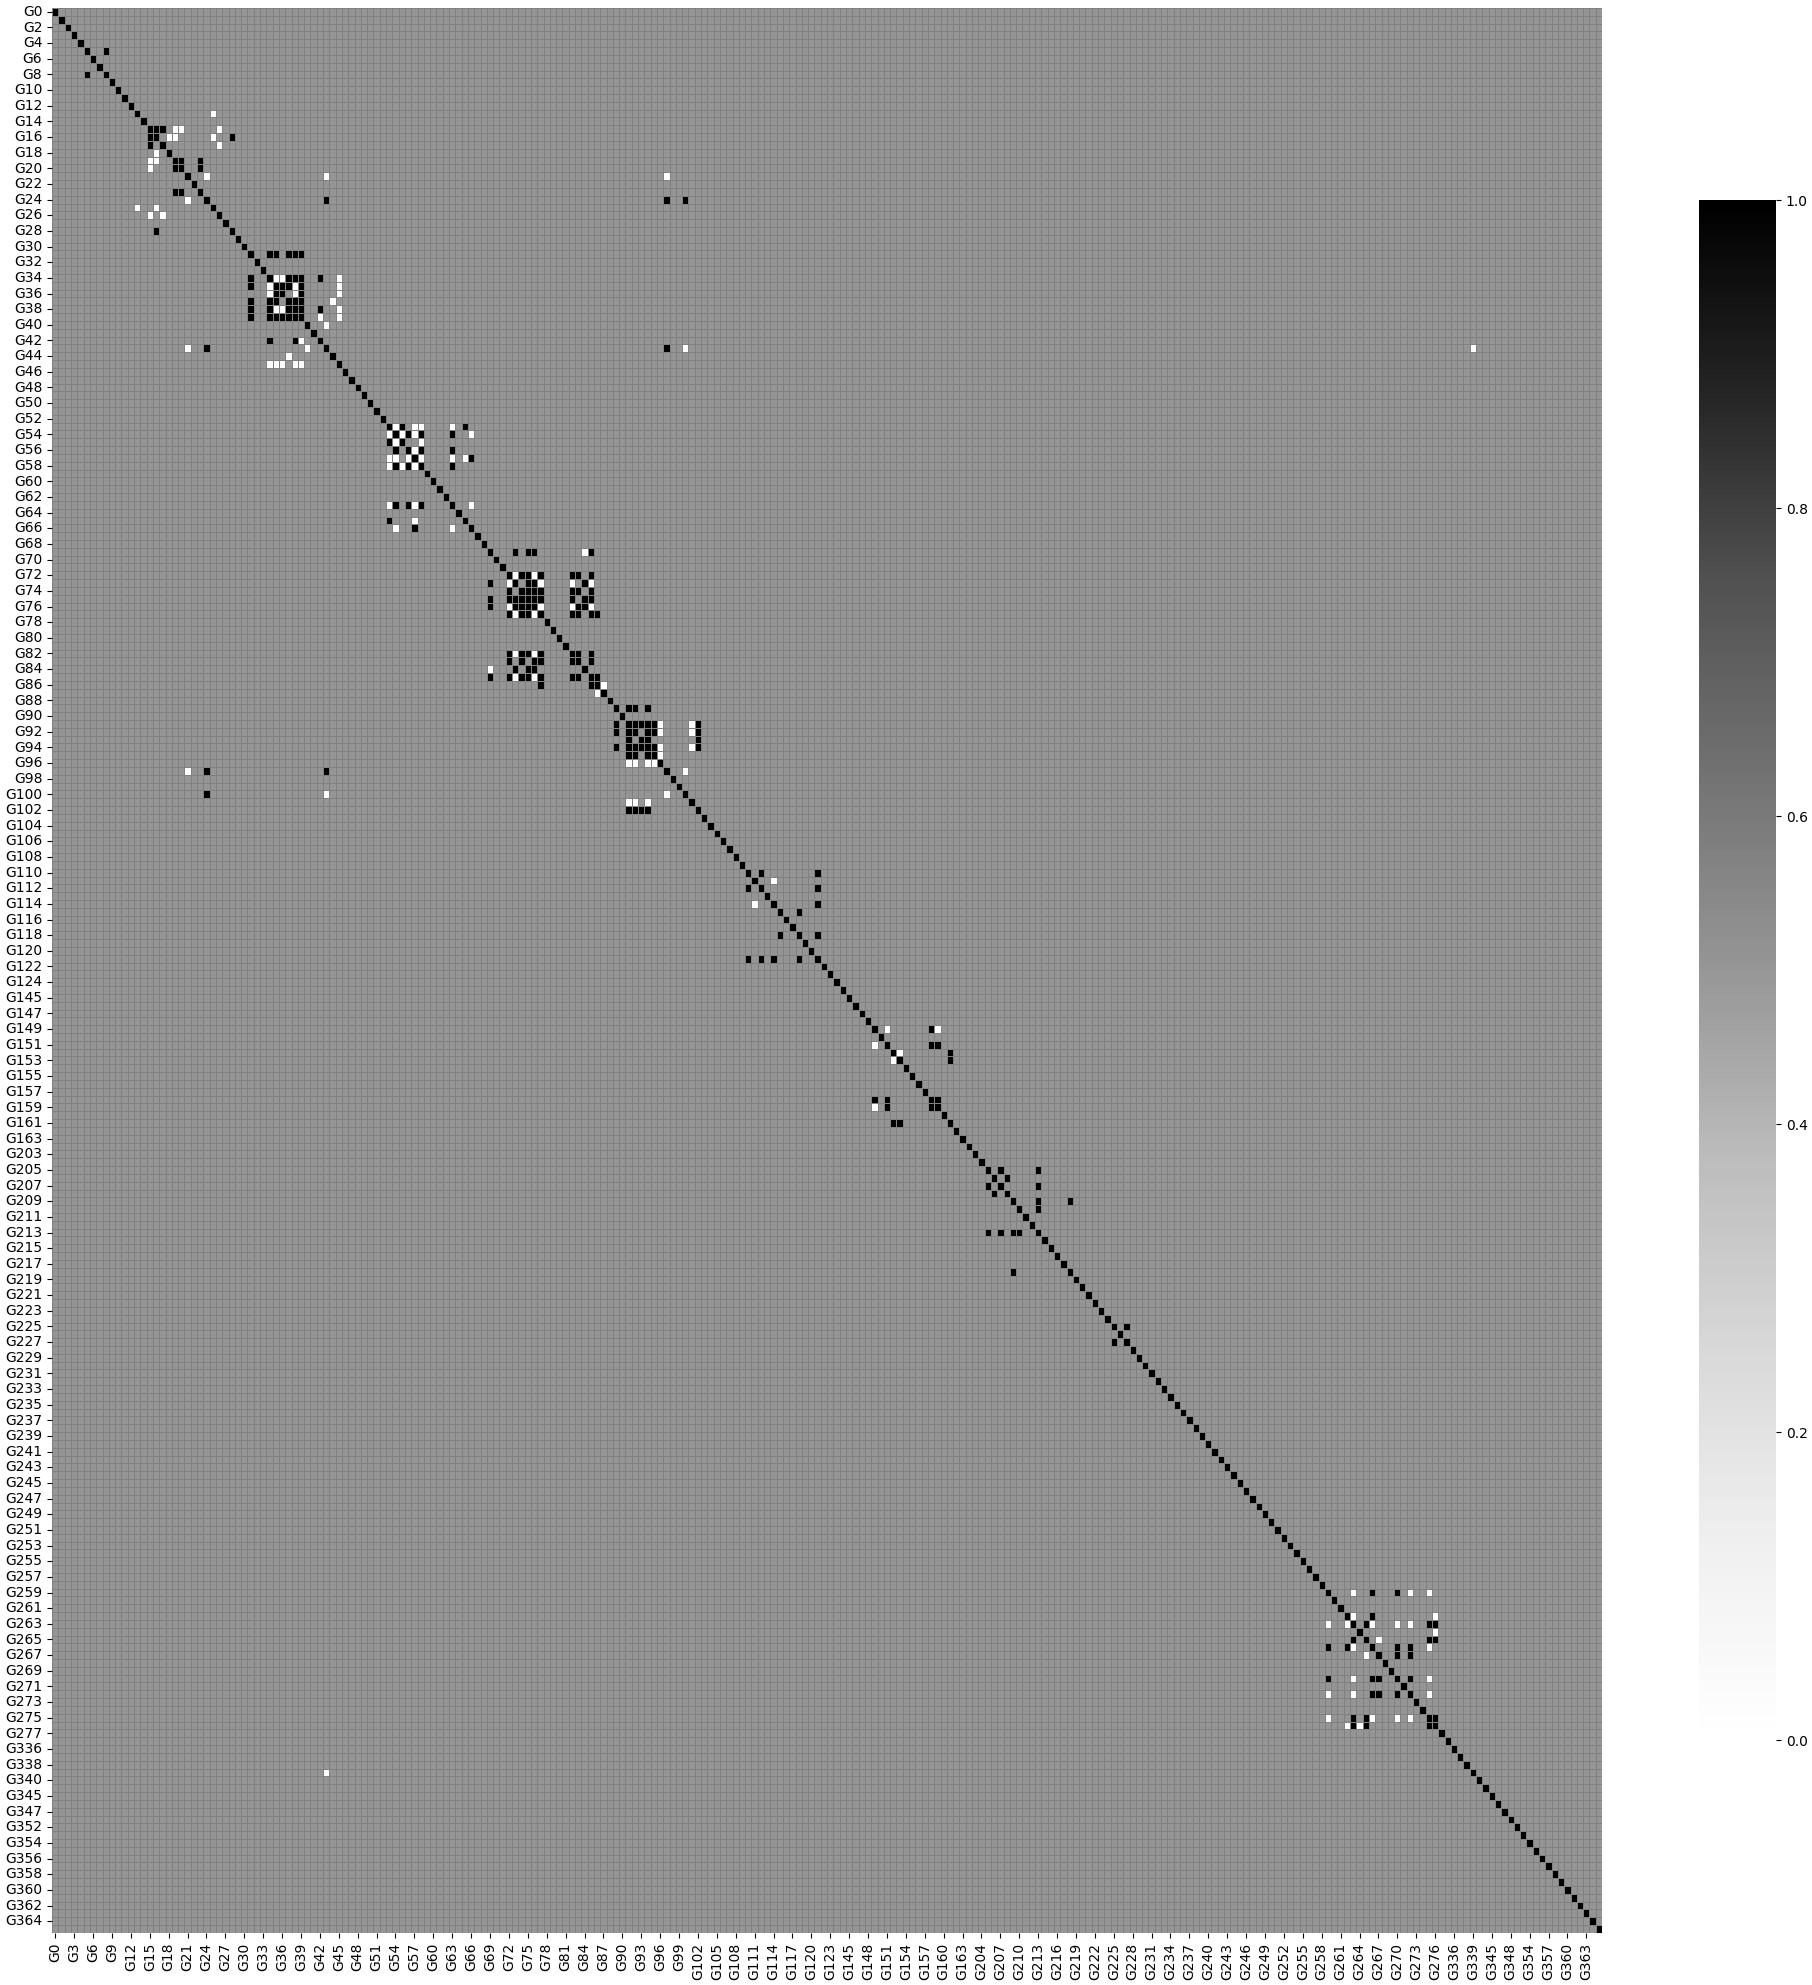

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
sb.heatmap(pd.DataFrame(pc4, index = list(graphs_74.keys()), columns = list(graphs_74.keys())), ax = ax, cmap = "Greys", robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

## Silhoute of fused > Silhoute of unimodal
## PR of fused > PR of unimodal

In [137]:
silhouette_dict  = {"correct":0, "incorrect":0 }
pr_dict  = {"correct":0, "incorrect":0 }


for id, psn in kernel_PSNs_level1.items():

    tm = make_transition_matrix(psn)
    score = random_walker_objective(tm)[2]
    
    first, second = compute.get_n_clusters(psn)
    l = cluster.spectral_clustering(psn, n_clusters=first, n_init = 30)

    sil = skl.metrics.silhouette_score(psn, l)

    if fused_rw_score >= score:
        pr_dict["correct"]+=1
    else:
        pr_dict["incorrect"]+=1
    
    if fused_silhouette_score >= sil:
        silhouette_dict["correct"]+=1
    else:
        silhouette_dict["incorrect"]+=1
    

In [138]:
silhouette_dict

{'correct': 202, 'incorrect': 44}

In [142]:
stats

{'adt': 11, 'cytof': 12, 'luminex': 1, 'facs': 1, 'bulkRNA': 1, 'citeRNA': 11}